<a href="https://colab.research.google.com/github/kanishkagargg/Mentorness-Internship/blob/main/World_cup_2023_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
worldcup_df = pd.read_csv('CWC23_all_innings.csv')
worldcup_df

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


In [3]:
worldcup_df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [4]:
worldcup_df[(worldcup_df['4s'].isnull()) & (worldcup_df['6s'].isnull()) & (worldcup_df['sr'].isnull()) & (worldcup_df['not_out'].isnull()) & (worldcup_df['mins'].isnull()) & (worldcup_df['bat_or_bowl'] == 'bowl')]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


In [5]:
worldcup_df[(worldcup_df['wkts'].isnull()) & (worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['overs'].isnull()) & (worldcup_df['mdns'].isnull()) & (worldcup_df['econ'].isnull())]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
501,AUS,GJ Maxwell (AUS),bat,128,201,NaN,0.000000,1.5703,v Afghanistan,Wankhede,7-Nov-23,NaN,NaN,NaN,2,21.0,10.0,157.03,1.0,181.0
502,SA,Q de Kock (SA),bat,140,174,NaN,0.007143,1.2428,v Bangladesh,Wankhede,24-Oct-23,NaN,NaN,NaN,1,15.0,7.0,124.28,0.0,192.0
503,AUS,DA Warner (AUS),bat,124,163,NaN,0.008065,1.3145,v Pakistan,Bengaluru,20-Oct-23,NaN,NaN,NaN,1,14.0,9.0,131.45,0.0,180.0
504,NZ,DP Conway (NZ),bat,121,152,NaN,0.000000,1.2561,v England,Ahmedabad,5-Oct-23,NaN,NaN,NaN,2,19.0,3.0,125.61,1.0,147.0
505,ENG,DJ Malan (ENG),bat,107,140,NaN,0.009346,1.3084,v Bangladesh,Dharamsala,10-Oct-23,NaN,NaN,NaN,1,16.0,5.0,130.84,0.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,AUS,GJ Maxwell (AUS),bat,5,1,NaN,0.200000,0.2000,v South Africa,Eden Gardens,16-Nov-23,NaN,NaN,NaN,2,0.0,0.0,20.00,0.0,8.0
1381,NZ,TWM Latham (NZ),bat,2,0,NaN,0.500000,0.0000,v India,Wankhede,15-Nov-23,NaN,NaN,NaN,2,0.0,0.0,0.00,0.0,1.0
1382,SA,T Bavuma (SA),bat,4,0,NaN,0.250000,0.0000,v Australia,Eden Gardens,16-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.00,0.0,5.0
1383,SA,M Jansen (SA),bat,1,0,NaN,1.000000,0.0000,v Australia,Eden Gardens,16-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.00,0.0,1.0


From above two codes, we get to know that only when a player is bowling, then only all batting metrics (4s, 6s, strike rate, not outs, mins) are null values. As well as when a player is batting, all metric of bowling (wickets, overs, maidens, economy rate.) are null.

In [6]:
pak_sa_bowl = worldcup_df[(worldcup_df['team'] == 'PAK') & (worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['opposition'] == 'v South Africa')]
pak_sa_bowl

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.050000,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
133,PAK,Usama Mir (PAK),bowl,48,45,2.0,0.041667,0.937500,v South Africa,Chennai,27-Oct-23,8.0,0.0,5.62,2,NaN,NaN,NaN,NaN,NaN
144,PAK,Mohammad Wasim (1) (PAK),bowl,60,50,2.0,0.033333,0.833333,v South Africa,Chennai,27-Oct-23,10.0,1.0,5.00,2,NaN,NaN,NaN,NaN,NaN
167,PAK,Haris Rauf (PAK),bowl,60,62,2.0,0.033333,1.033333,v South Africa,Chennai,27-Oct-23,10.0,0.0,6.20,2,NaN,NaN,NaN,NaN,NaN
378,PAK,Iftikhar Ahmed (PAK),bowl,18,23,0.0,0.000000,1.277778,v South Africa,Chennai,27-Oct-23,3.0,0.0,7.66,2,NaN,NaN,NaN,NaN,NaN
428,PAK,Mohammad Nawaz (3) (PAK),bowl,38,40,0.0,0.000000,1.052632,v South Africa,Chennai,27-Oct-23,6.2,0.0,6.31,2,NaN,NaN,NaN,NaN,NaN


In [8]:
sa_pak_bat = worldcup_df[(worldcup_df['opposition'] == 'v Pakistan') & (worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['team'] == 'SA')]
sa_pak_bat

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
539,SA,AK Markram (SA),bat,93,91,NaN,0.010753,0.9784,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,7.0,3.0,97.84,0.0,151.0
738,SA,DA Miller (SA),bat,33,29,NaN,0.030303,0.8787,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,2.0,2.0,87.87,0.0,55.0
749,SA,T Bavuma (SA),bat,27,28,NaN,0.037037,1.0370,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,4.0,1.0,103.70,0.0,49.0
777,SA,Q de Kock (SA),bat,14,24,NaN,0.071429,1.7142,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,5.0,0.0,171.42,0.0,19.0
806,SA,HE van der Dussen (SA),bat,39,21,NaN,0.025641,0.5384,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,0.0,0.0,53.84,0.0,71.0
820,SA,M Jansen (SA),bat,14,20,NaN,0.071429,1.4285,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,2.0,1.0,142.85,0.0,18.0
935,SA,H Klaasen (SA),bat,10,12,NaN,0.100000,1.2000,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,0.0,1.0,120.00,0.0,12.0
977,SA,G Coetzee (SA),bat,13,10,NaN,0.076923,0.7692,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,0.0,0.0,76.92,0.0,23.0
1031,SA,KA Maharaj (SA),bat,21,7,NaN,0.000000,0.3333,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,1.0,0.0,33.33,1.0,44.0
1090,SA,T Shamsi (SA),bat,6,4,NaN,0.000000,0.6666,v Pakistan,Chennai,27-Oct-23,NaN,NaN,NaN,2,0.0,0.0,66.66,1.0,14.0


In [7]:
pak_sa_bowl['runs'].sum()

265

In [9]:
sa_pak_bat['runs'].sum()

250

From above 4 codes we can see that in second inning when pakistan was bowling and South Africa was batting, number of runs that South Africa made was less that what Pakistan gave. It means that from batting perspective, extras like wide balls or no ball is counted in it. Hence the actual score is the runs what bowlers gave (inclusive of all extras).

In [10]:
len(worldcup_df[worldcup_df.duplicated()])

2

In [11]:
worldcup_df[worldcup_df.duplicated(keep=False)]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
1234,ENG,AAP Atkinson (ENG),bat,1,0,NaN,1.0,0.0,v Pakistan,Eden Gardens,11-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,1.0
1235,PAK,Abdullah Shafique (PAK),bat,2,0,NaN,0.5,0.0,v England,Eden Gardens,11-Nov-23,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,2.0
1314,ENG,AAP Atkinson (ENG),bat,1,0,NaN,1.0,0.0,v Pakistan,Eden Gardens,11-Nov-23,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,1.0
1315,PAK,Abdullah Shafique (PAK),bat,2,0,NaN,0.5,0.0,v England,Eden Gardens,11-Nov-23,NaN,NaN,NaN,2,0.0,0.0,0.0,0.0,2.0


In [12]:
worldcup_df.drop_duplicates()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,NZ,MJ Santner (NZ),bowl,60,51,0.0,0.00,0.850000,v India,Wankhede,15-Nov-23,10.0,1.0,5.10,1,NaN,NaN,NaN,NaN,NaN
1404,AUS,A Zampa (AUS),bowl,42,55,0.0,0.00,1.309524,v South Africa,Eden Gardens,16-Nov-23,7.0,0.0,7.85,1,NaN,NaN,NaN,NaN,NaN
1405,NZ,R Ravindra (NZ),bowl,42,60,0.0,0.00,1.428571,v India,Wankhede,15-Nov-23,7.0,0.0,8.57,1,NaN,NaN,NaN,NaN,NaN
1406,IND,RA Jadeja (IND),bowl,60,63,0.0,0.00,1.050000,v New Zealand,Wankhede,15-Nov-23,10.0,0.0,6.30,2,NaN,NaN,NaN,NaN,NaN


In [13]:
worldcup_df['opposition_new'] = worldcup_df['opposition']
worldcup_df['opposition_new'] = worldcup_df['opposition_new'].map({'v South Africa': 'SA', 'v India': 'IND', 'v England': 'ENG',
                                      'v Bangladesh': 'BAN', 'v Pakistan' : 'PAK', 'v Netherlands' : 'NED', 'v New Zealand' : 'NZ', 'v Sri Lanka' : 'SL',
                                      'v Australia' : 'AUS', 'v Afghanistan' : 'AFG'})
worldcup_df[['opposition_new', 'opposition']]

,opposition_new,opposition
0,SA,v South Africa
1,IND,v India
2,ENG,v England
3,BAN,v Bangladesh
4,PAK,v Pakistan
...,...,...
1403,IND,v India
1404,SA,v South Africa
1405,IND,v India
1406,NZ,v New Zealand


In [14]:
worldcup_df.loc[worldcup_df['opposition_new'] == worldcup_df['team']]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,...,overs,mdns,econ,inns,4s,6s,sr,not_out,mins,opposition_new
1339,NED,V Kohli (IND),bowl,18,13,1.0,0.055556,0.722222,v Netherlands,Bengaluru,...,3.0,0.0,4.33,2,NaN,NaN,NaN,NaN,NaN,NED


In [15]:
worldcup_df.drop(index=[1339], inplace = True)
worldcup_df[worldcup_df['opposition_new'] == worldcup_df['team']]

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,...,overs,mdns,econ,inns,4s,6s,sr,not_out,mins,opposition_new


In [16]:
worldcup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1407
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1407 non-null   object 
 1   player           1407 non-null   object 
 2   bat_or_bowl      1407 non-null   object 
 3   bb_bf            1407 non-null   int64  
 4   runs             1407 non-null   int64  
 5   wkts             561 non-null    float64
 6   wicketball_prob  1407 non-null   float64
 7   runs_per_ball    1407 non-null   float64
 8   opposition       1407 non-null   object 
 9   ground           1407 non-null   object 
 10  start_date       1407 non-null   object 
 11  overs            561 non-null    float64
 12  mdns             561 non-null    float64
 13  econ             561 non-null    float64
 14  inns             1407 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [17]:
worldcup_df['Last Updated'] = pd.to_datetime(worldcup_df['start_date'])       # converting data type of to date time
worldcup_df['Last Updated'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1407 entries, 0 to 1407
Series name: Last Updated
Non-Null Count  Dtype         
--------------  -----         
1407 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.0 KB


In [18]:
for i in worldcup_df.columns.tolist():
  print("No. of unique values in ",i,"is",worldcup_df[i].nunique(),".")

No. of unique values in  team is 10 .
No. of unique values in  player is 152 .
No. of unique values in  bat_or_bowl is 2 .
No. of unique values in  bb_bf is 117 .
No. of unique values in  runs is 128 .
No. of unique values in  wkts is 7 .
No. of unique values in  wicketball_prob is 129 .
No. of unique values in  runs_per_ball is 645 .
No. of unique values in  opposition is 10 .
No. of unique values in  ground is 10 .
No. of unique values in  start_date is 41 .
No. of unique values in  overs is 38 .
No. of unique values in  mdns is 4 .
No. of unique values in  econ is 230 .
No. of unique values in  inns is 2 .
No. of unique values in  4s is 20 .
No. of unique values in  6s is 12 .
No. of unique values in  sr is 429 .
No. of unique values in  not_out is 2 .
No. of unique values in  mins is 156 .
No. of unique values in  opposition_new is 10 .
No. of unique values in  Last Updated is 41 .


In [20]:
for i in cat_cols:
  print("No. of unique values in ",i,"is",worldcup_df[i].unique(),".")

No. of unique values in  team is ['PAK' 'ENG' 'NZ' 'AFG' 'NED' 'BAN' 'SA' 'SL' 'AUS' 'IND'] .
No. of unique values in  bat_or_bowl is ['bowl' 'bat'] .
No. of unique values in  opposition is ['v South Africa' 'v India' 'v England' 'v Bangladesh' 'v Pakistan'
 'v Netherlands' 'v New Zealand' 'v Sri Lanka' 'v Australia'
 'v Afghanistan'] .
No. of unique values in  ground is ['Chennai' 'Lucknow' 'Ahmedabad' 'Delhi' 'Pune' 'Dharamsala'
 'Eden Gardens' 'Bengaluru' 'Wankhede' 'Hyderabad'] .
No. of unique values in  start_date is ['27-Oct-23' '29-Oct-23' '5-Oct-23' '13-Oct-23' '23-Oct-23' '15-Oct-23'
 '8-Nov-23' '17-Oct-23' '31-Oct-23' '4-Nov-23' '24-Oct-23' '7-Oct-23'
 '6-Nov-23' '28-Oct-23' '10-Oct-23' '20-Oct-23' '21-Oct-23' '5-Nov-23'
 '26-Oct-23' '18-Oct-23' '14-Oct-23' '25-Oct-23' '9-Nov-23' '10-Nov-23'
 '12-Oct-23' '3-Nov-23' '16-Oct-23' '6-Oct-23' '8-Oct-23' '2-Nov-23'
 '22-Oct-23' '9-Oct-23' '30-Oct-23' '11-Oct-23' '1-Nov-23' '19-Oct-23'
 '7-Nov-23' '11-Nov-23' '12-Nov-23' '15-Nov-23'

*	There are 846 missing values in wickets, overs, maidens and economy rate. These missing values makes sense when that player is batting. There are 562 missing values in 4s, 6s, strike rate, not out and mins. This happens when player is bowling. Hence, I will keep them as NA only as replacing them or removing them will not make any good. When analyzing further, I will just use filter in bat_or_ball column to access batting and bowling metrics.
*	There are two duplicated rows in the dataset. I removed them and kept one from each of them.
*	There is one wrong information row in which both teams are Netherland. Hence, I removed that row as it is difficult to guess that which info is wrong and what to change (either team, player or opposition team).
*	Data type of Start date is changed to date type.


## Team Performance Analysis

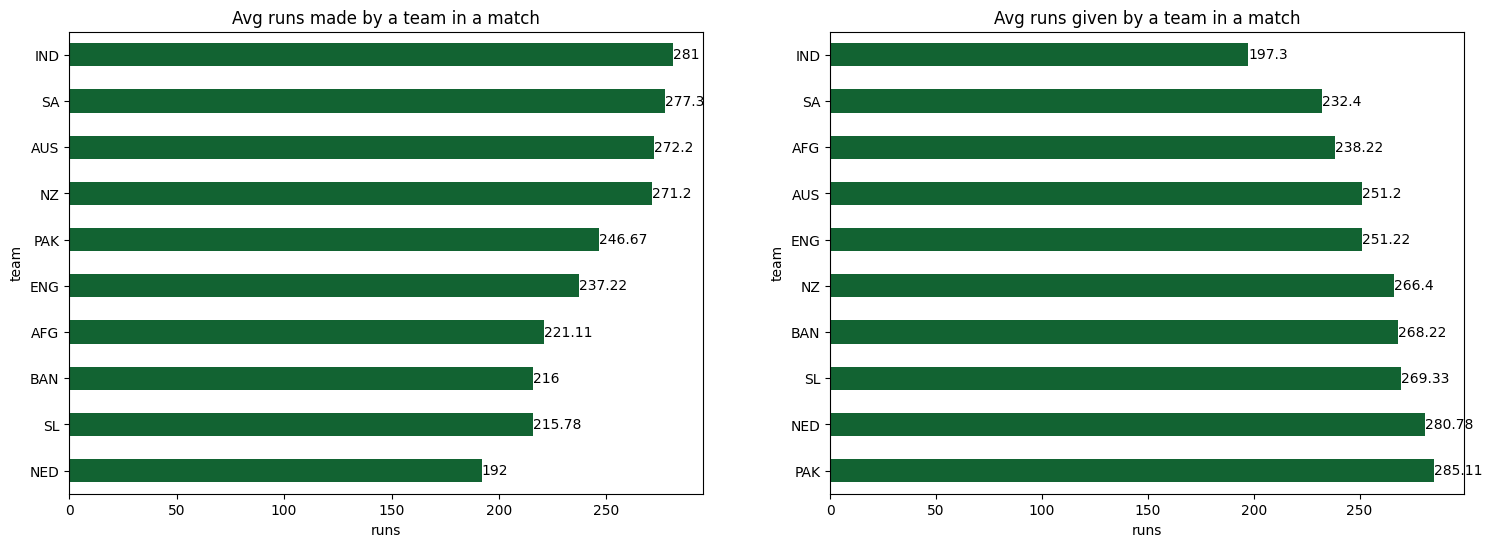

In [ ]:
# average runs given by a team in a match

opposite_compar_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs'].sum()
avg_runs_given = round(opposite_compar_bowl.groupby(['team'], as_index = False)['runs'].mean(),2).sort_values(by = 'runs', ascending = True)

# average runs made by a team in a match

opposite_compar_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs'].sum()
avg_runs_made = round(opposite_compar_bat.groupby(['team'], as_index = False)['runs'].mean(),2).sort_values(by = 'runs', ascending = False)

fig = plt.figure(figsize =(18, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'team', x= 'runs' ,data = avg_runs_made, width=0.5)
plt.title("Avg runs made by a team in a match")
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'team', x= 'runs' ,data = avg_runs_given, width=0.5)
plt.title("Avg runs given by a team in a match")
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs'].sum()

,team,opposition,Last Updated,runs
0,AFG,v Australia,2023-11-07,288
1,AFG,v Bangladesh,2023-10-07,155
2,AFG,v England,2023-10-15,211
3,AFG,v India,2023-10-11,268
4,AFG,v Netherlands,2023-11-03,177
...,...,...,...,...
89,SL,v India,2023-11-02,346
90,SL,v Netherlands,2023-10-21,256
91,SL,v New Zealand,2023-11-09,172
92,SL,v Pakistan,2023-10-10,345


<ipython-input-112-512cbcbad30d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  opposite_compar_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs', 'bb_bf'].sum()
<ipython-input-112-512cbcbad30d>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  opposite_compar_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs', 'bb_bf'].sum()


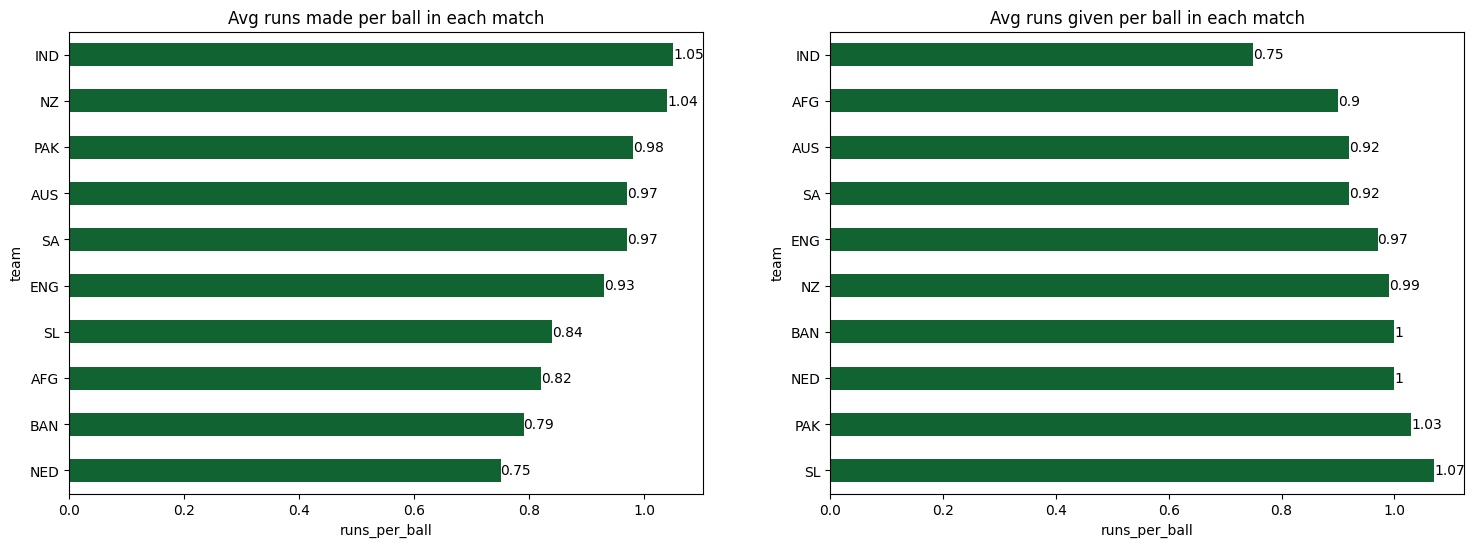

In [ ]:
# average runs made per ball by each team in each match

opposite_compar_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs', 'bb_bf'].sum()
opposite_compar_bat['runs_per_ball'] = opposite_compar_bat['runs']/opposite_compar_bat['bb_bf']
runs_per_ball_bat = round(opposite_compar_bat.groupby(['team'], as_index = False)['runs_per_ball'].mean(),2).sort_values(by = 'runs_per_ball', ascending = False)

# average runs given per ball by each team in each match

opposite_compar_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team','opposition', 'Last Updated'], as_index = False)['runs', 'bb_bf'].sum()
opposite_compar_bowl['runs_per_ball'] = opposite_compar_bowl['runs']/opposite_compar_bowl['bb_bf']
runs_per_ball_bowl = round(opposite_compar_bowl.groupby(['team'], as_index = False)['runs_per_ball'].mean(),2).sort_values(by = 'runs_per_ball', ascending = True)

fig = plt.figure(figsize =(18, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'team', x= 'runs_per_ball' ,data = runs_per_ball_bat, width=0.5)
plt.title("Avg runs made per ball in each match")
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'team', x= 'runs_per_ball' ,data = runs_per_ball_bowl, width=0.5)
plt.title("Avg runs given per ball in each match")
for bars in ax.containers:
    ax.bar_label(bars)

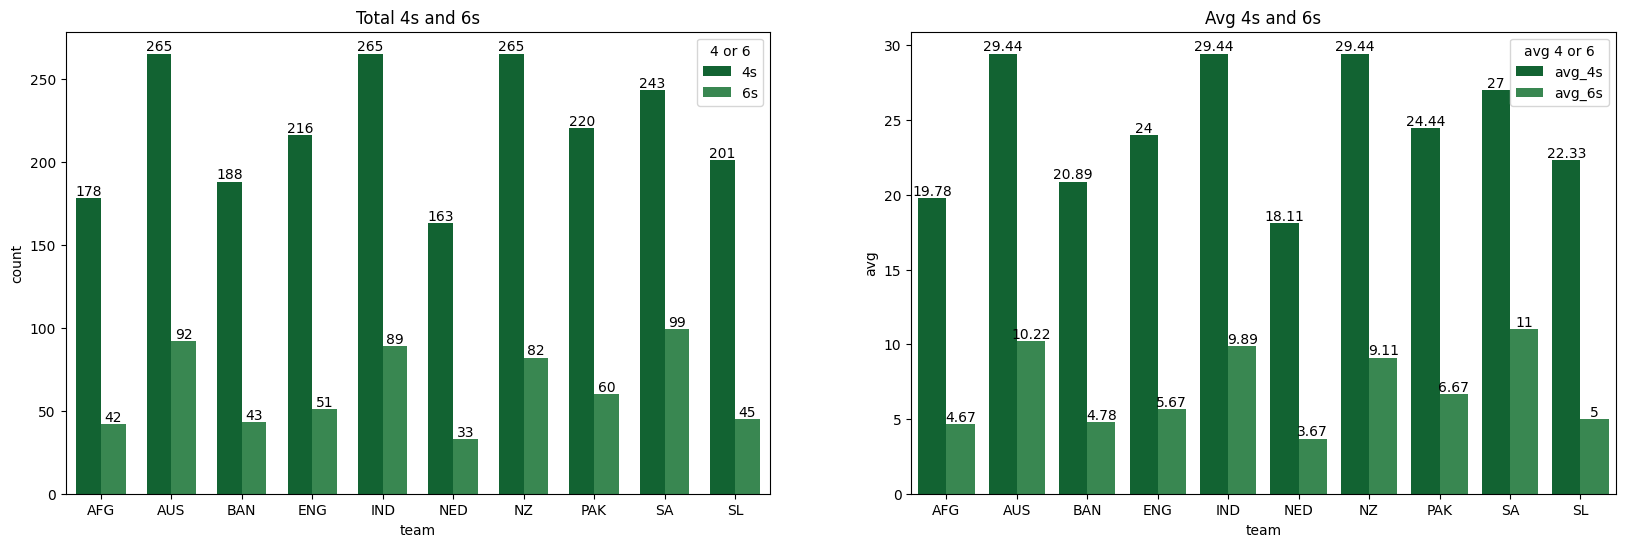

In [ ]:
# total and avg of 4s and 6s by each team
total_four = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['team'], as_index = False)['4s'].sum()
total_six = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['team'], as_index = False)['6s'].sum()

fours_sixs = total_four.join(total_six.set_index('team'), on='team')
dfm = pd.melt(fours_sixs, id_vars="team", var_name="4 or 6", value_name="count")

fig = plt.figure(figsize =(20, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(x='team', y='count', hue='4 or 6', data=dfm, width=0.7)

fours_sixs['avg_4s'] = round(fours_sixs['4s']/9,2)
fours_sixs['avg_6s'] = round(fours_sixs['6s']/9,2)
fours_sixs.drop(['4s', '6s'], axis = 'columns', inplace = True)
dfm = pd.melt(fours_sixs, id_vars="team", var_name="avg 4 or 6", value_name="avg")
plt.title("Total 4s and 6s")
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='team', y='avg', hue='avg 4 or 6', data=dfm, width=0.8)
plt.title("Avg 4s and 6s")
for bars in ax.containers:
    ax.bar_label(bars)

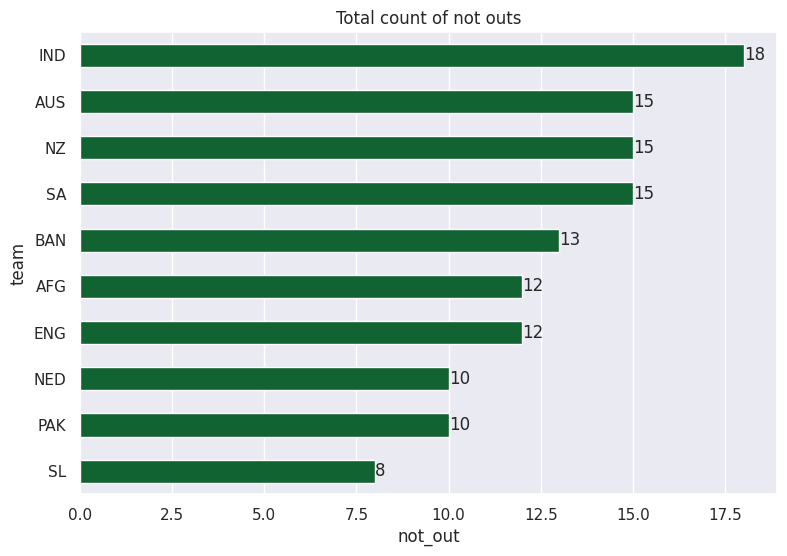

In [ ]:
# number of instances when a batsman end up getting not out till the end of a match by each team

not_out_df = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['not_out'] == 1)].groupby(['team'], as_index = False)['not_out'].count().sort_values(by = 'not_out', ascending = False)
fig = plt.figure(figsize =(9, 6))
sns.set_palette('Greens_r')
ax = sns.barplot(y = 'team', x= 'not_out' ,data = not_out_df, width=0.5)
plt.title("Total count of not outs")
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Wickets sum and average')

<Figure size 800x600 with 0 Axes>

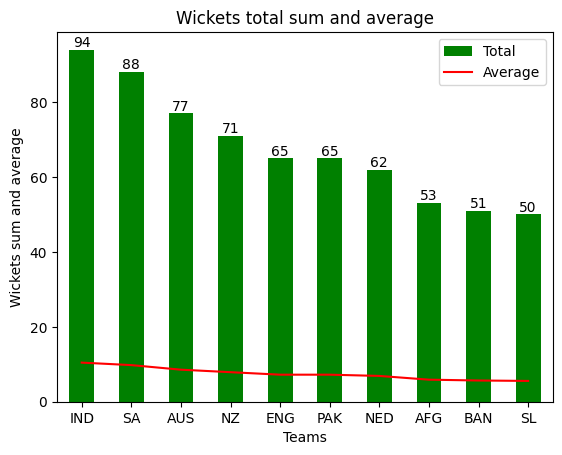

In [ ]:
# Total wickets and average wicket by each team

wkts_info = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team'], as_index = False)['wkts'].sum().sort_values(by = 'wkts', ascending=False)
wkts_info['avg_wkt'] = wkts_info['wkts']/9

plt.figure(figsize = (8,6))
ax1=wkts_info.plot(kind='bar', x='team', y='wkts', color='g', label='Total')
for bars in ax1.containers:
    ax1.bar_label(bars)
ax2=wkts_info.plot(kind='line', x='team', y='avg_wkt', color='r', label='Average', ax=ax1)

plt.title("Wickets total sum and average")
ax1.set_xlabel('Teams')
ax1.set_ylabel('Wickets sum and average')

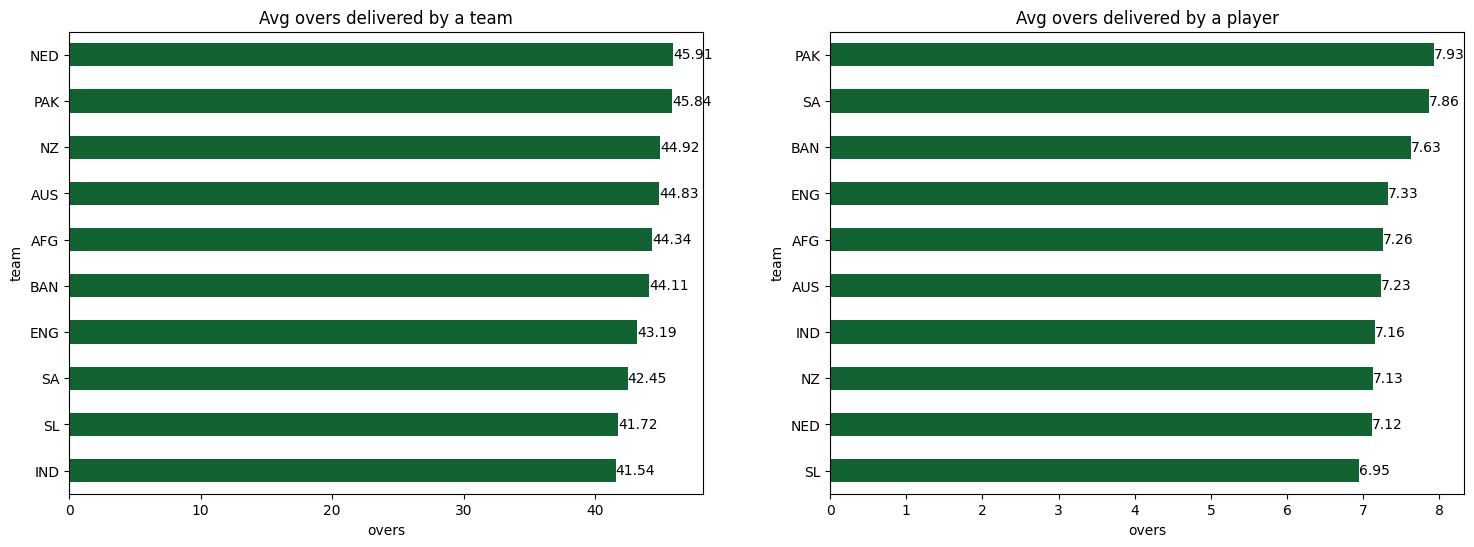

In [ ]:
# average overs delivered by a team in a match

opposite_compar_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team', 'opposition', 'Last Updated'], as_index = False)['overs'].sum()
avg_overs_byTeam = round(opposite_compar_bowl.groupby(['team'], as_index = False)['overs'].mean(), 2).sort_values(by = 'overs', ascending = False)

# average overs delivered by a bowler by each team

avg_overs_byPlayer = round(worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team'], as_index = False)['overs'].mean(),2).sort_values(by = 'overs', ascending = False)

fig = plt.figure(figsize =(18, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'team', x= 'overs', data = avg_overs_byTeam, width=0.5)
plt.title("Avg overs delivered by a team")
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'team', x= 'overs', data = avg_overs_byPlayer, width=0.5)
plt.title("Avg overs delivered by a player")
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Maiden count and average')

<Figure size 800x600 with 0 Axes>

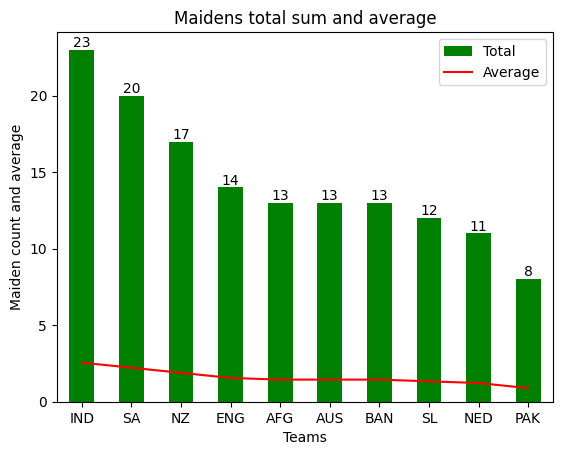

In [ ]:
# total maidens given by each team

maidens_count = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team'], as_index = False)['mdns'].sum().sort_values(by = 'mdns', ascending = False)
maidens_count['avg_mdns'] = maidens_count['mdns']/9

plt.figure(figsize = (8,6))
ax1= maidens_count.plot(kind='bar', x='team', y='mdns', color='g', label='Total')
for bars in ax1.containers:
    ax1.bar_label(bars)
ax2= maidens_count.plot(kind='line', x='team', y='avg_mdns', color='r', label='Average', ax=ax1)

plt.title("Maidens total sum and average")
ax1.set_xlabel('Teams')
ax1.set_ylabel('Maiden count and average')

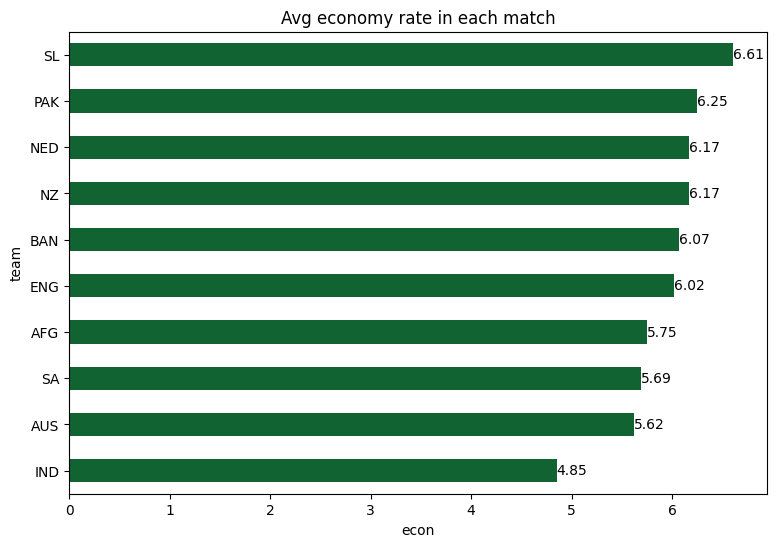

In [ ]:
# average economy rate of each match by each team

per_match_econ = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team','opposition', 'Last Updated'], as_index = False)['econ'].mean()
per_team_econ = round(per_match_econ.groupby(['team'], as_index = False)['econ'].mean(),2).sort_values(by = 'econ', ascending = False)

plt.figure(figsize = (9,6))
ax = sns.barplot(y = 'team', x= 'econ', data = per_team_econ, width=0.5)
plt.title("Avg economy rate in each match")
for bars in ax.containers:
    ax.bar_label(bars)

#### **Top performing teams -** India (Best performer), Australia, South Africa, New Zealand,

#### **Poor performing teams -** Sri Lanka, Pakistan, Neatherlands

India is the best performer as it tops in the following:
* Consistent highest runs made and lowest runs given in a match.
* Consistent in giving lowest runs on a ball.
* Maximum 4s through out the tournament along with Australia and New Zealand.
* Highest number of not outs in the tournament.
* Highest number of wickets taken in the tournament.
* Highest maidens in the tournament.

Other top performers and lowest performers are based on either top 4 or bottom 3 ranks on above parameters.


## Player Performance Analysis

In [ ]:
player_per_match = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['player', 'opposition', 'Last Updated'], as_index = False)['runs'].sum()
total_runs_player = player_per_match.groupby(['player'], as_index = False)['runs'].sum()
max_runs_player = player_per_match.groupby(['player'], as_index = False)['runs'].max()
min_runs_player = player_per_match.groupby(['player'], as_index = False)['runs'].min()
avg_runs_player = round(player_per_match.groupby(['player'], as_index = False)['runs'].mean(),2)


df = pd.merge(pd.merge(pd.merge(avg_runs_player,max_runs_player,on='player'),total_runs_player,on='player'),min_runs_player,on='player')
df.columns = ['player', 'mean','max', 'sum', 'min']
df[['player', 'sum', 'max','min', 'mean']].sort_values(by = 'sum', ascending = False).head(10)

# Virat Kohli (IND) made maximum total runs of 711 with an average of 71 runs in all matches. His maximum score his 117 and minimum is 0.
# Then comes Q de Kock (SA)	with second highehst total runs of 594 with an average of 174 across all matches. His maximum score is 59 and minimum of 3.

<ipython-input-74-d234ec50295d>:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'runs_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(pd.merge(pd.merge(avg_runs_player,max_runs_player,on='player'),total_runs_player,on='player'),min_runs_player,on='player')


,player,sum,max,min,mean
142,V Kohli (IND),711,117,0,71.10
104,Q de Kock (SA),594,174,3,59.40
106,R Ravindra (NZ),578,123,9,57.80
26,DJ Mitchell (NZ),552,134,1,61.33
109,RG Sharma (IND),550,131,0,55.00
24,DA Warner (AUS),528,163,11,52.80
122,SS Iyer (IND),526,128,0,52.60
39,HE van der Dussen (SA),448,133,1,44.80
82,MR Marsh (AUS),426,177,0,47.33
4,AK Markram (SA),406,106,1,40.60


In [ ]:
df[['player', 'max', 'min']].sort_values(by = 'max', ascending = False).head(10)

,player,max,min
36,GJ Maxwell (AUS),201,0
82,MR Marsh (AUS),177,0
104,Q de Kock (SA),174,3
24,DA Warner (AUS),163,11
30,DP Conway (NZ),152,0
25,DJ Malan (ENG),140,6
26,DJ Mitchell (NZ),134,1
39,HE van der Dussen (SA),133,1
89,Mohammad Rizwan (PAK),131,8
109,RG Sharma (IND),131,0


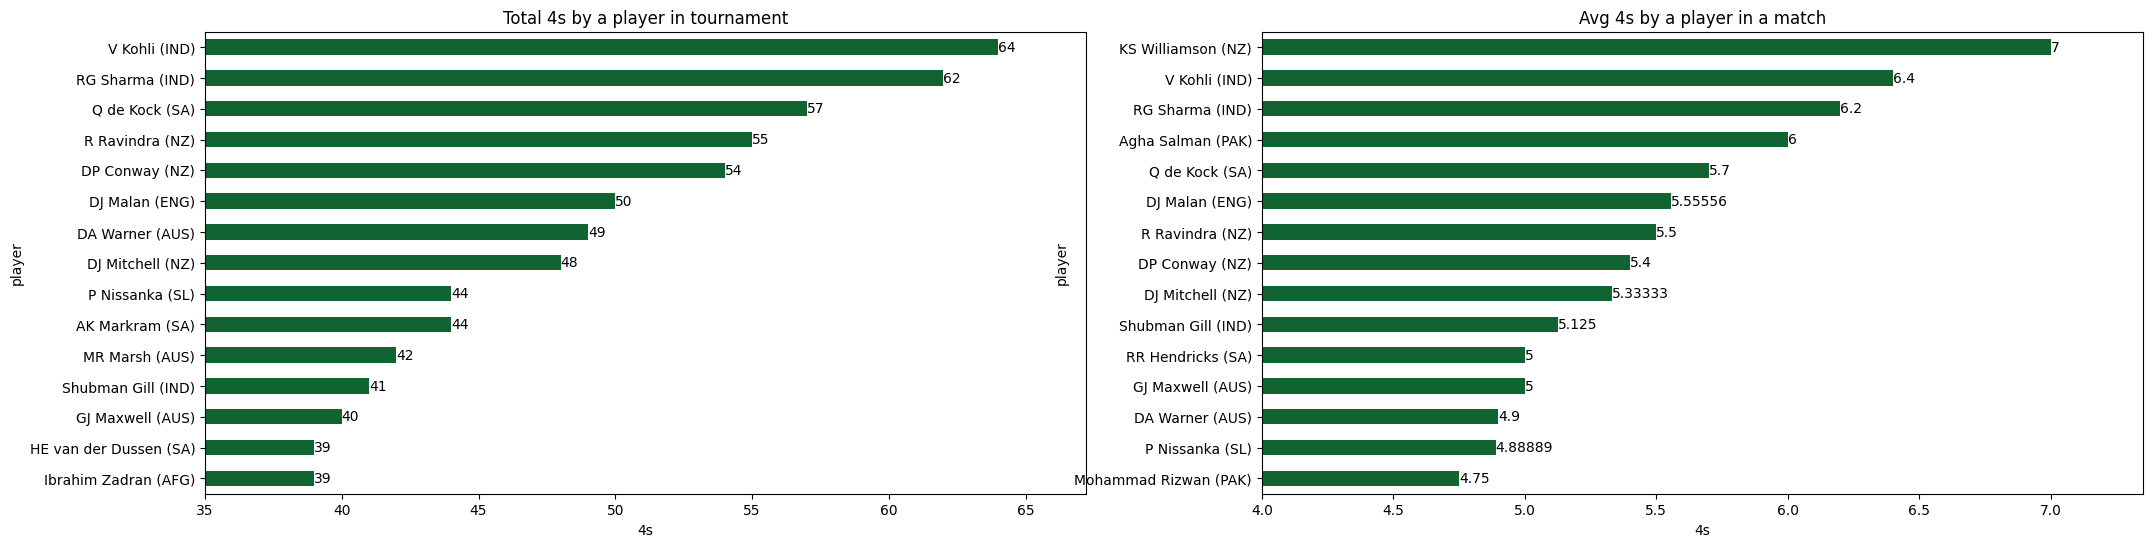

In [ ]:
plyr_4s_sum = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['player'], as_index = False)['4s'].sum().sort_values(by = '4s', ascending = False).head(15)
plyr_4s_avg = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['player'], as_index = False)['4s'].mean().sort_values(by = '4s', ascending = False).head(15)

fig = plt.figure(figsize =(25, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'player', x= '4s' ,data = plyr_4s_sum, width=0.5)
plt.title("Total 4s by a player in tournament")
plt.xlim(35, None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'player', x= '4s' ,data = plyr_4s_avg, width=0.5)
plt.title("Avg 4s by a player in a match")
plt.xlim(4, None)
for bars in ax.containers:
    ax.bar_label(bars)

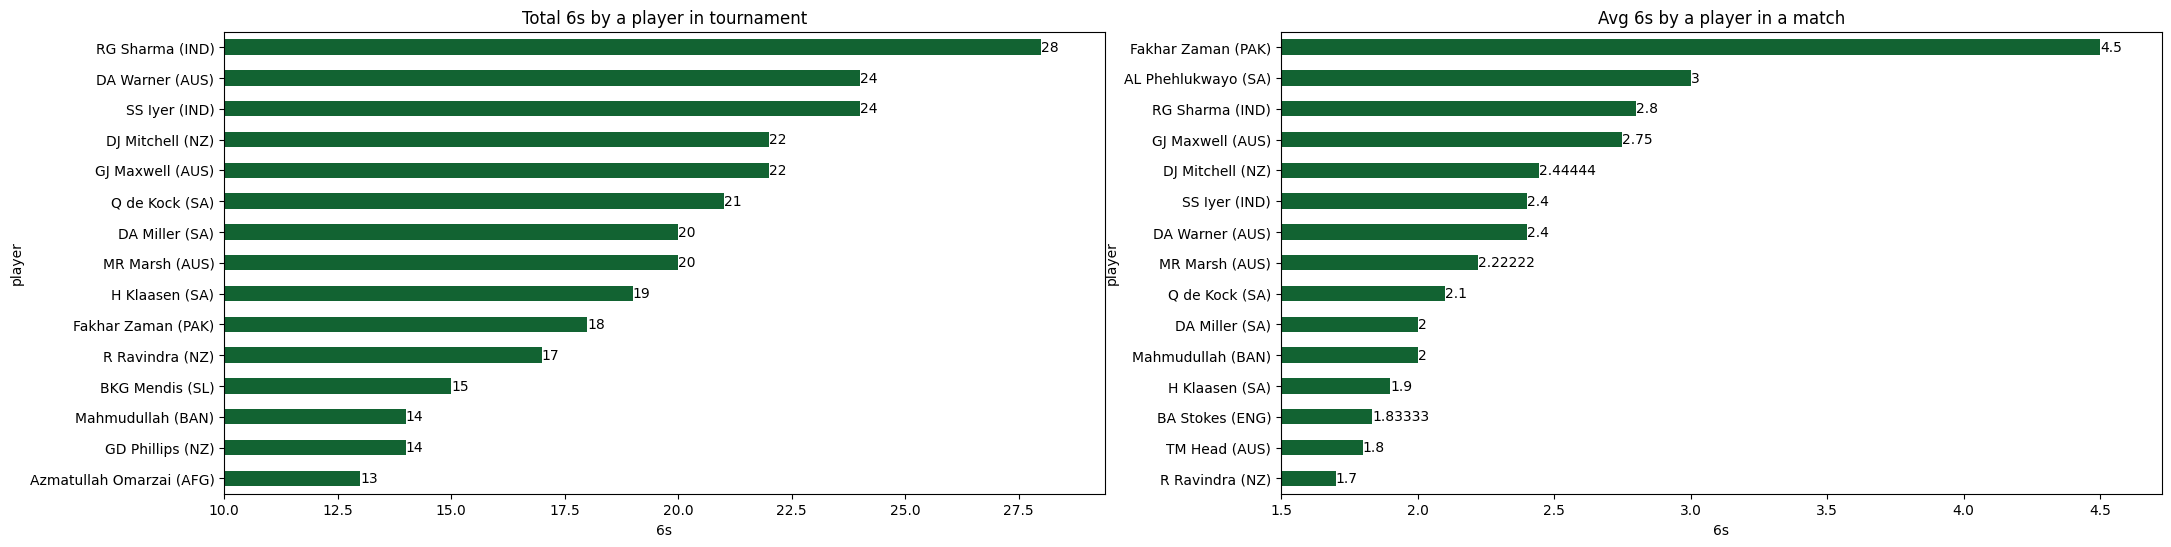

In [ ]:
plyr_4s_sum = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['player'], as_index = False)['6s'].sum().sort_values(by = '6s', ascending = False).head(15)
plyr_4s_avg = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat')].groupby(['player'], as_index = False)['6s'].mean().sort_values(by = '6s', ascending = False).head(15)

fig = plt.figure(figsize =(25, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'player', x= '6s' ,data = plyr_4s_sum, width=0.5)
plt.title("Total 6s by a player in tournament")
plt.xlim(10, None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'player', x= '6s' ,data = plyr_4s_avg, width=0.5)
plt.title("Avg 6s by a player in a match")
plt.xlim(1.5, None)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
not_out_df = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['not_out'] == 1)].groupby(['player'], as_index = False)['not_out'].count().sort_values(by = 'not_out', ascending = False)
not_out_df.head(10)

,player,not_out
69,Shoriful Islam (BAN),4
57,PJ Cummins (AUS),4
29,KL Rahul (IND),4
0,A Dutt (NED),3
22,Hashmatullah Shahidi (AFG),3
71,T Shamsi (SA),3
68,Shaheen Shah Afridi (PAK),3
67,SS Iyer (IND),3
41,MJ Santner (NZ),3
1,A Zampa (AUS),3


(1.5, 4.025)

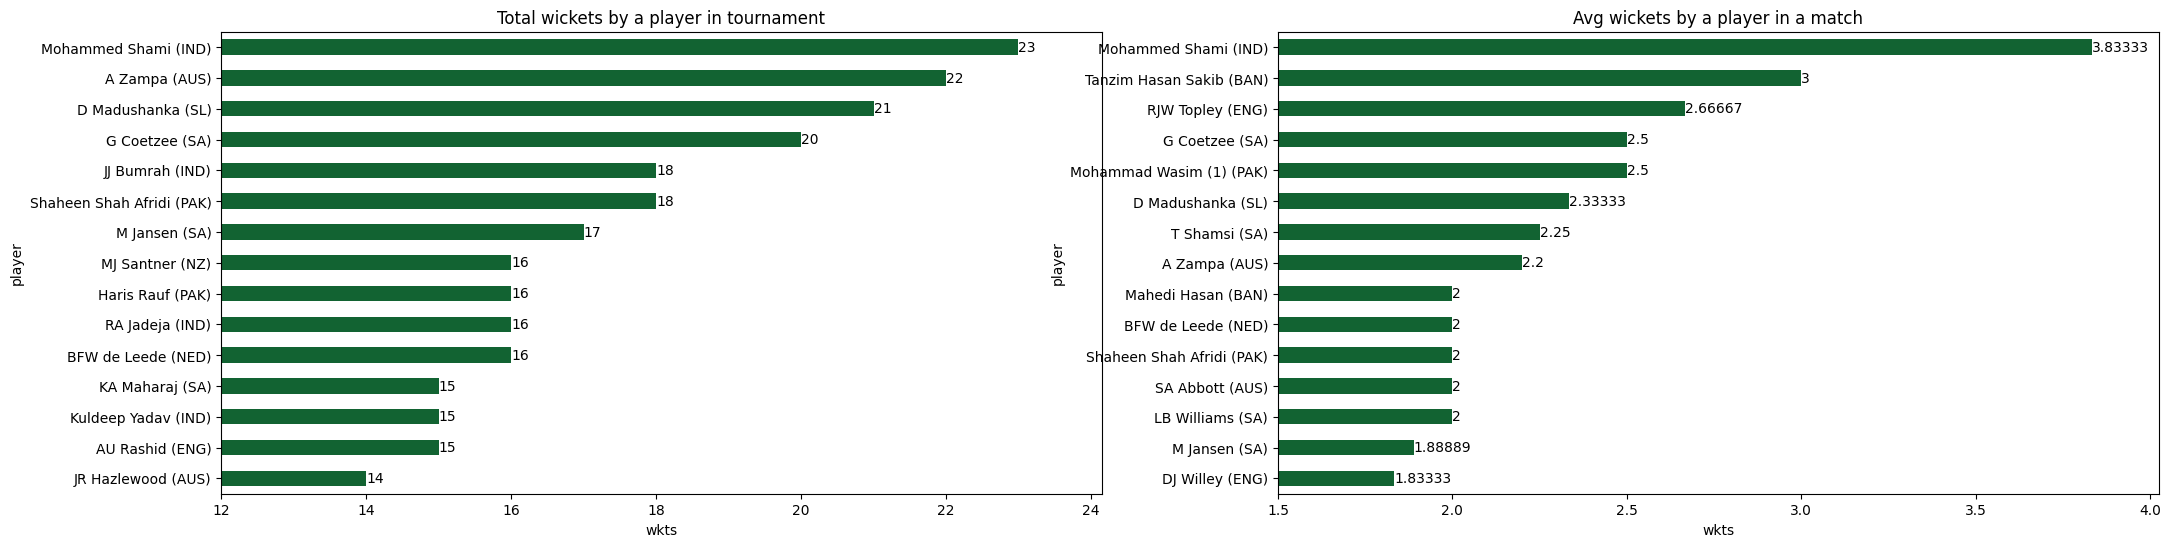

In [ ]:
plyr_wkts_sum = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['wkts'].sum().sort_values(by = 'wkts', ascending = False).head(15)
plyr_wkts_avg = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['wkts'].mean().sort_values(by = 'wkts', ascending = False).head(15)

fig = plt.figure(figsize =(25, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'player', x= 'wkts' ,data = plyr_wkts_sum, width=0.5)
plt.title("Total wickets by a player in tournament")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlim(12, None)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'player', x= 'wkts' ,data = plyr_wkts_avg, width=0.5)
plt.title("Avg wickets by a player in a match")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlim(1.5, None)

(0.5, 0.8714999999999999)

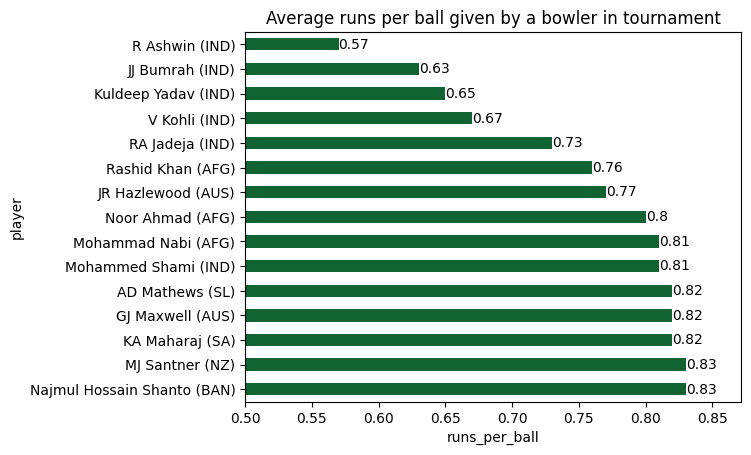

In [ ]:
runs_per_ball = round(worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['runs_per_ball'].mean().sort_values(by = 'runs_per_ball', ascending = True).head(15), 2)
ax = sns.barplot(y = 'player', x= 'runs_per_ball' ,data = runs_per_ball, width=0.5)
plt.title("Average runs per ball given by a bowler in tournament")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlim(0.5, None)

<ipython-input-45-151dc22d51f1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  over_runs = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['overs', 'runs'].sum().sort_values(by = 'overs', ascending = False).head(7)


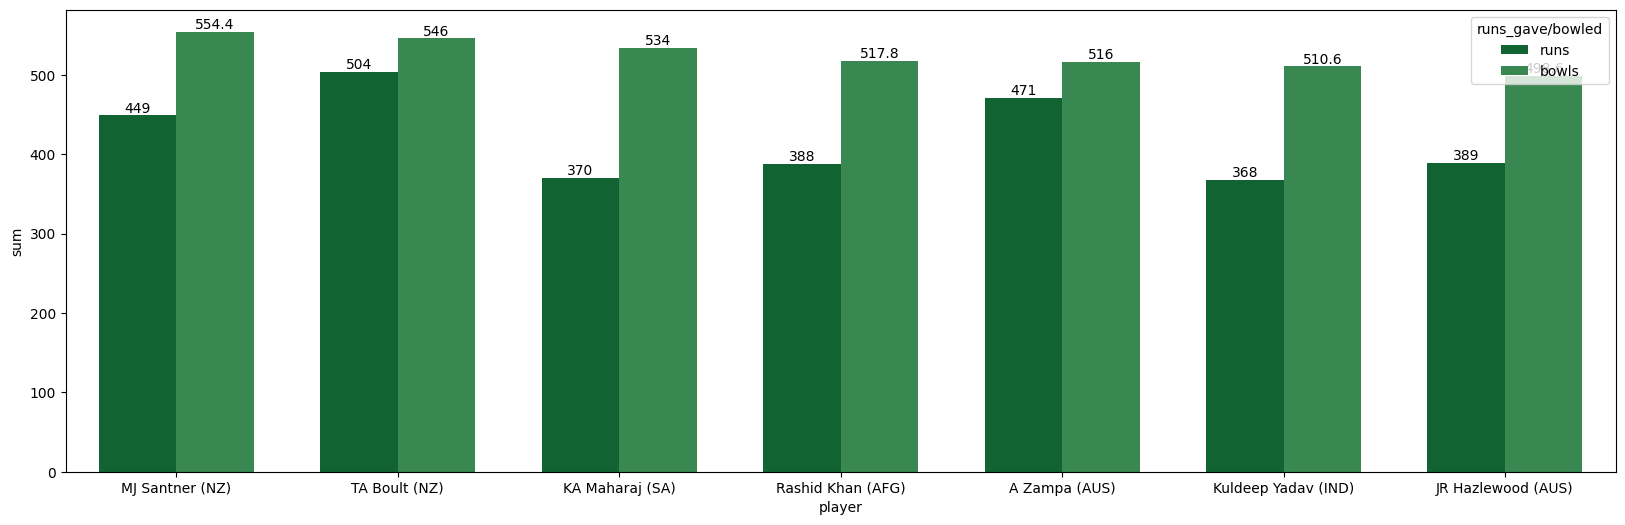

In [ ]:
over_runs = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['overs', 'runs'].sum().sort_values(by = 'overs', ascending = False).head(7)
over_runs['bowls'] = over_runs['overs']*6
over_runs.drop(['overs'], axis = 'columns', inplace = True)
dfm = pd.melt(over_runs, id_vars="player", var_name="runs_gave/bowled", value_name="sum")

fig = plt.figure(figsize =(20, 6))
sns.set_palette('Greens_r')
ax = sns.barplot(x='player', y='sum', hue='runs_gave/bowled', data=dfm, width=0.7)
for bars in ax.containers:
    ax.bar_label(bars)

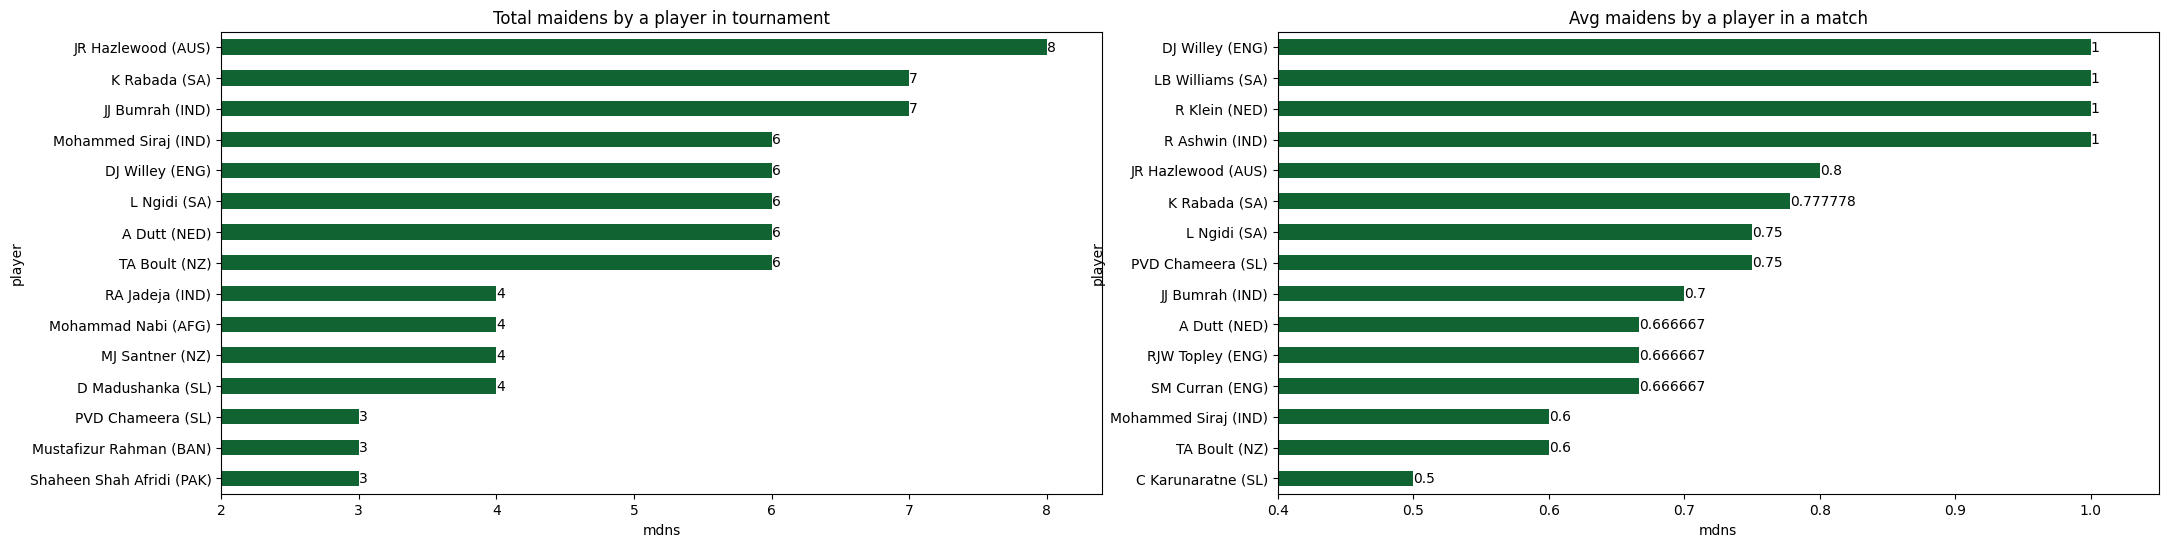

In [ ]:
plyr_mdns_sum = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['mdns'].sum().sort_values(by = 'mdns', ascending = False).head(15)
plyr_mdns_avg = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['mdns'].mean().sort_values(by = 'mdns', ascending = False).head(15)

fig = plt.figure(figsize =(25, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'player', x= 'mdns' ,data = plyr_mdns_sum, width=0.5)
plt.title("Total maidens by a player in tournament")
plt.xlim(2, None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'player', x= 'mdns' ,data = plyr_mdns_avg, width=0.5)
plt.title("Avg maidens by a player in a match")
plt.xlim(0.4, None)
for bars in ax.containers:
    ax.bar_label(bars)


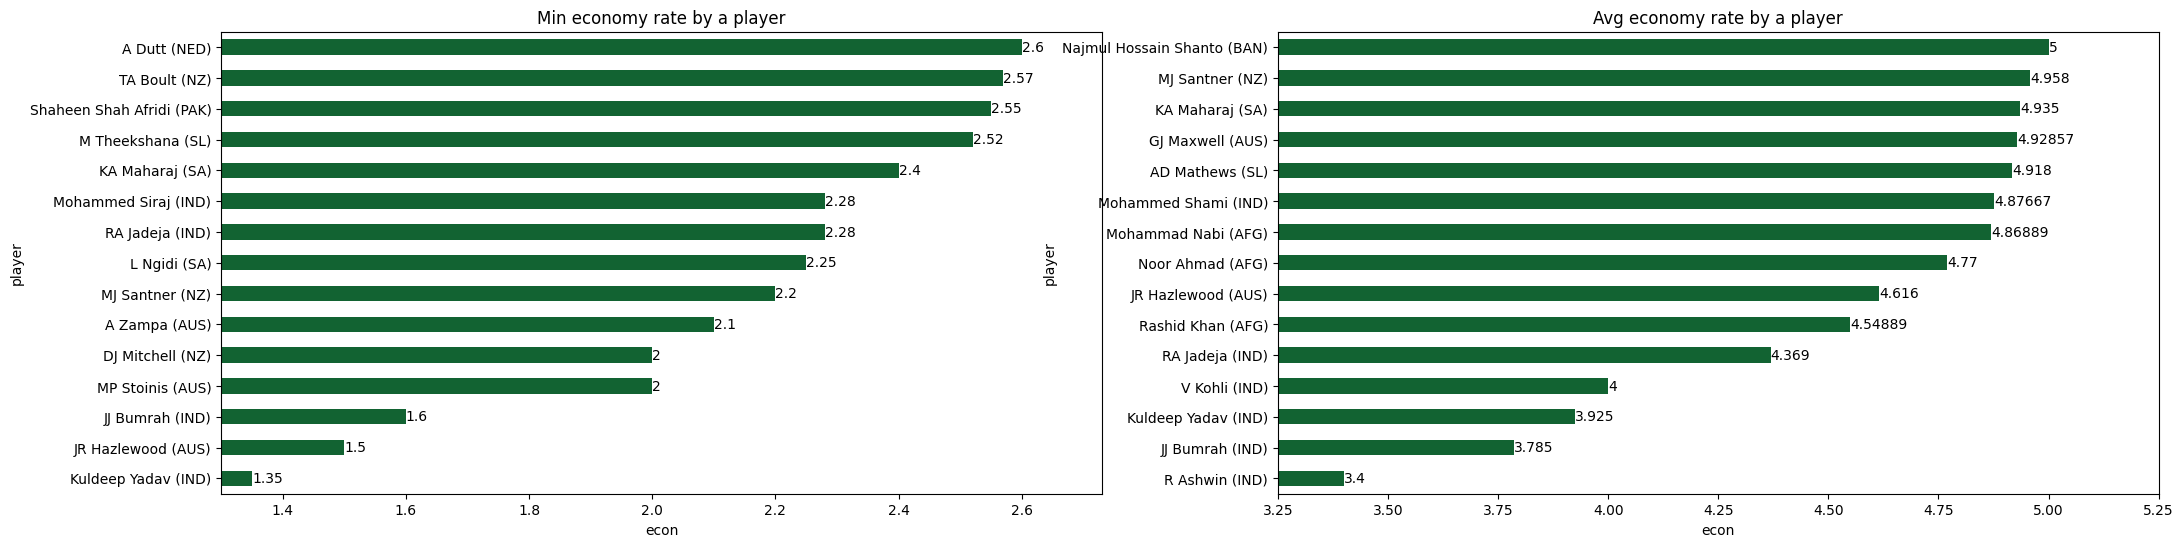

In [ ]:
plyr_econ_max = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['econ'].min().sort_values(by = 'econ', ascending = False).tail(15)
plyr_econ_avg = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['player'], as_index = False)['econ'].mean().sort_values(by = 'econ', ascending = False).tail(15)


fig = plt.figure(figsize =(25, 6))
sns.set_palette('Greens_r')

plt.subplot(1, 2, 1)
ax = sns.barplot(y = 'player', x= 'econ' ,data = plyr_econ_max, width=0.5)
plt.title("Min economy rate by a player")
plt.xlim(1.3, None)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
ax = sns.barplot(y = 'player', x= 'econ' ,data = plyr_econ_avg, width=0.5)
plt.title("Avg economy rate by a player")
plt.xlim(3.25, None)
for bars in ax.containers:
    ax.bar_label(bars)


Insights :-

**Top batsman -** V Kohli (IND), R G Sharma (IND), Q de Kock (SA), DJ Mitchell (NZ)

**Top bowlers -** JJ Bumrah (IND), Mohammed Shami (IND), Kuldeep Yadav (IND)

Important points regarding batting:
* GJ Maxwell was the only batsman who scored 201 in a single inning. MR Marsh (AUS) made second highest runs of 177 in a single inning.
* V Kohli tops in total runs scored, average runs scored and total 4s.
* RG Sharma tops in total 6s.
* Shoriful Islam, PJ Cummins and KL Rahul are the three batsman who were not out 4 times each (maximum as compared to others).
* Virat Kohli (IND) made maximum total runs of 711 with an average of 71 runs in all matches. His maximum score his 117 and minimum is 0.
* Then comes Q de Kock (SA)	with second highest total runs of 594 with an average of 174 across all matches. His maximum score is 59 and minimum of 3.
* Other top performers are based on top 6 ranks on various parameters.

Important points regarding bowling:
* Mohammed Shami who took maximum wickets with consistency too (maximum average).
* JR Hazelwood (AUS) gave maximum maidens which is 8, K Rabada and JJ Bumrah with 7 maidens each.
* Kuldeep Yadav had a minimum economy rate of 1.35 by giving just 7 runs when he bowled 5.1 overs (31 bowls)
* MJ Santber bowled maximum total balls in the tournament with 554 balls bowled and giving 449 runs on it.
* In giving least runs on a ball, team India tops the first 5 ranks with R Ashwin having least runs per ball of 0.57.
* Other top performers are based on top 6 ranks on various parameters.

## Opposition and Ground Analysis

In [ ]:
PAK_info = worldcup_df[(worldcup_df['team'] == 'PAK')]
ENG_info = worldcup_df[(worldcup_df['team'] == 'ENG')]
NZ_info = worldcup_df[(worldcup_df['team'] == 'NZ')]
AFG_info = worldcup_df[(worldcup_df['team'] == 'AFG')]
NED_info = worldcup_df[(worldcup_df['team'] == 'NED')]
BAN_info = worldcup_df[(worldcup_df['team'] == 'BAN')]
SA_info = worldcup_df[(worldcup_df['team'] == 'SA')]
SL_info = worldcup_df[(worldcup_df['team'] == 'SL')]
AUS_info = worldcup_df[(worldcup_df['team'] == 'AUS')]
IND_info = worldcup_df[(worldcup_df['team'] == 'IND')]

In [ ]:
bat_inn_1 = worldcup_df[(worldcup_df['inns'] == 1) & (worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team', 'opposition_new', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
bat_inn_2 = worldcup_df[(worldcup_df['inns'] == 2) & (worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team', 'opposition_new', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
bat_inn_2[['team', 'opposition_new']] = bat_inn_2[['opposition_new', 'team']]

<ipython-input-69-805b6541cac9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bat_inn_1 = worldcup_df[(worldcup_df['inns'] == 1) & (worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team', 'opposition_new', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
<ipython-input-69-805b6541cac9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bat_inn_2 = worldcup_df[(worldcup_df['inns'] == 2) & (worldcup_df['bat_or_bowl'] == 'bowl')].groupby(['team', 'opposition_new', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()


In [ ]:
Teams_results = bat_inn_1.merge(bat_inn_2, on=['team', 'opposition_new', 'Last Updated'])
Teams_results[['inn_1_team_runs', 'inn_2_oppo_runs']] = Teams_results[['runs_x', 'runs_y']]
Teams_results.head()

,team,opposition_new,Last Updated,runs_x,wkts_x,runs_y,wkts_y,inn_1_team_runs,inn_2_oppo_runs
0,AFG,NED,2023-11-03,177,6.0,178,3.0,177,178
1,AFG,NZ,2023-10-18,284,6.0,139,10.0,284,139
2,AFG,PAK,2023-10-23,278,7.0,286,2.0,278,286
3,AFG,SL,2023-10-30,239,8.0,241,3.0,239,241
4,AUS,AFG,2023-11-07,286,5.0,288,6.0,286,288


In [ ]:
Teams_results['Win'] = Teams_results['team']

In [ ]:
for i in range(47):
  if Teams_results['inn_1_team_runs'][i] < Teams_results['inn_2_oppo_runs'][i]:
    Teams_results['Win'][i] = Teams_results['team'][i]
  else:
    Teams_results['Win'][i] = Teams_results['opposition_new'][i]

Teams_results.head()

<ipython-input-72-455cdcdc663d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teams_results['Win'][i] = Teams_results['team'][i]
<ipython-input-72-455cdcdc663d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teams_results['Win'][i] = Teams_results['opposition_new'][i]


,team,opposition_new,Last Updated,runs_x,wkts_x,runs_y,wkts_y,inn_1_team_runs,inn_2_oppo_runs,Win
0,AFG,NED,2023-11-03,177,6.0,178,3.0,177,178,AFG
1,AFG,NZ,2023-10-18,284,6.0,139,10.0,284,139,NZ
2,AFG,PAK,2023-10-23,278,7.0,286,2.0,278,286,AFG
3,AFG,SL,2023-10-30,239,8.0,241,3.0,239,241,AFG
4,AUS,AFG,2023-11-07,286,5.0,288,6.0,286,288,AUS


In [ ]:
Teams_results.drop(['runs_x', 'runs_y'], axis = 'columns', inplace = True)
Teams_results.sort_values(by = 'Last Updated', ascending = True)

,team,opposition_new,Last Updated,wkts_x,wkts_y,inn_1_team_runs,inn_2_oppo_runs,Win
30,NZ,ENG,2023-10-05,9.0,1.0,282,278,ENG
27,NED,PAK,2023-10-06,9.0,9.0,286,205,PAK
46,SL,SA,2023-10-07,5.0,10.0,427,321,SA
9,BAN,AFG,2023-10-07,10.0,3.0,156,155,AFG
19,IND,AUS,2023-10-08,10.0,4.0,193,199,IND
26,NED,NZ,2023-10-09,7.0,9.0,319,222,NZ
38,PAK,SL,2023-10-10,9.0,4.0,340,345,PAK
10,BAN,ENG,2023-10-10,9.0,10.0,361,223,ENG
18,IND,AFG,2023-10-11,8.0,2.0,267,268,IND
6,AUS,SA,2023-10-12,7.0,10.0,305,173,SA


In [ ]:
pd.DataFrame(Teams_results['Win'].value_counts())

,Win
IND,10
AUS,8
SA,6
AFG,5
NZ,5
ENG,4
PAK,4
NED,3
SL,2


In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [ ]:
pak_bat = PAK_info[(PAK_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
pak_bowl = PAK_info[(PAK_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

pak_compare = pd.merge(pak_bat, pak_bowl,on='opposition')
pak_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
pak_compare

opposition Last Updated_x runs         4s    6s          sr  wkts mdns  \
                                  sum  max   sum   sum        mean   sum  sum   
0   v Afghanistan     2023-10-23  265   74  17.0   9.0   92.743750   2.0  2.0   
1     v Australia     2023-10-20  286   70  34.0   6.0   98.634000   9.0  1.0   
2    v Bangladesh     2023-10-31  201   81  19.0   9.0  100.276000  10.0  2.0   
3       v England     2023-11-11  238   51  27.0   6.0   70.842500   8.0  1.0   
4         v India     2023-10-14  187   50  26.0   0.0   61.847273   3.0  0.0   
5   v Netherlands     2023-10-06  277   68  33.0   3.0   81.577273   9.0  1.0   
6   v New Zealand     2023-11-04  196  126  15.0  13.0  101.583333   6.0  0.0   
7  v South Africa     2023-10-27  251   52  23.0   8.0   82.628000   9.0  1.0   
8     v Sri Lanka     2023-10-10  319  131  26.0   6.0  117.991667   9.0  0.0   

       econ  
       mean  
0  5.868333  
1  7.126667  
2  4.368000  
3  6.741667  
4  6.418000  
5  5.021667  
6  8.178333  
7  5.881667  
8  6.680000

In [ ]:
eng_bat = ENG_info[(ENG_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
eng_bowl = ENG_info[(ENG_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})


eng_compare = pd.merge(eng_bat, eng_bowl,on='opposition')
eng_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
eng_compare

opposition Last Updated_x runs         4s    6s          sr  wkts mdns  \
                                  sum  max   sum   sum        mean   sum  sum   
0   v Afghanistan     2023-10-15  202   66  24.0   1.0   86.760909   8.0  2.0   
1     v Australia     2023-11-04  239   64  22.0   6.0   71.508000  10.0  1.0   
2    v Bangladesh     2023-10-10  357  140  41.0   7.0  109.147273  10.0  1.0   
3         v India     2023-10-29  121   27  10.0   3.0   46.783636   8.0  5.0   
4   v Netherlands     2023-11-08  318  108  26.0  10.0  115.322727   9.0  2.0   
5   v New Zealand     2023-10-05  276   77  21.0   6.0   93.630909   1.0  2.0   
6      v Pakistan     2023-11-11  318   84  35.0   8.0  102.487500  10.0  0.0   
7  v South Africa     2023-10-21  155   43  18.0   9.0  110.700000   7.0  1.0   
8     v Sri Lanka     2023-10-26  149   43  19.0   1.0   67.446364   2.0  0.0   

       econ  
       mean  
0  6.490000  
1  5.880000  
2  4.708333  
3  4.773333  
4  4.612000  
5  7.910000  
6  5.524000  
7  8.020000  
8  6.293333

In [ ]:
nz_bat = NZ_info[(NZ_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
nz_bowl = NZ_info[(NZ_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

nz_compare = pd.merge(nz_bat, nz_bowl,on='opposition')
nz_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
nz_compare

opposition Last Updated_x runs         4s    6s          sr  wkts  \
                                   sum  max   sum   sum        mean   sum   
0    v Afghanistan     2023-10-18  278   71  19.0  11.0  102.096250  10.0   
1      v Australia     2023-10-28  357  116  33.0  12.0  118.571000  10.0   
2     v Bangladesh     2023-10-13  237   89  20.0   6.0   99.334000   9.0   
3        v England     2023-10-05  275  152  30.0   8.0   84.576667   9.0   
4          v India     2023-10-22  258  130  19.0   7.0   55.640000   5.0   
5          v India     2023-10-22  258  130  19.0   7.0   55.640000   4.0   
6          v India     2023-11-15  298  134  28.0  11.0   90.646364   5.0   
7          v India     2023-11-15  298  134  28.0  11.0   90.646364   4.0   
8    v Netherlands     2023-10-09  309   70  30.0  10.0  120.561111   9.0   
9       v Pakistan     2023-11-04  375  108  46.0   8.0  130.921250   1.0   
10  v South Africa     2023-11-01  155   60  17.0   4.0   57.221000   4.0   
11     v Sri Lanka     2023-11-09  170   45  23.0   5.0  121.335714  10.0   

   mdns      econ  
    sum      mean  
0   4.0  4.115000  
1   0.0  9.375714  
2   1.0  5.868571  
3   2.0  5.760000  
4   0.0  5.798333  
5   1.0  7.831667  
6   0.0  5.798333  
7   1.0  7.831667  
8   0.0  4.825000  
9   1.0  7.021667  
10  1.0  7.498571  
11  7.0  3.605000

In [ ]:
afg_bat = AFG_info[(AFG_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
afg_bowl = AFG_info[(AFG_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

afg_compare = pd.merge(afg_bat, afg_bowl,on='opposition')
afg_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
afg_compare

opposition Last Updated_x runs         4s   6s          sr  wkts mdns  \
                                  sum  max   sum  sum        mean   sum  sum   
0     v Australia     2023-11-07  275  129  16.0  9.0  105.642857   6.0  3.0   
1    v Bangladesh     2023-10-07  148   47  15.0  2.0   56.287000   3.0  1.0   
2       v England     2023-10-15  269   80  23.0  8.0   83.178182  10.0  3.0   
3         v India     2023-10-11  257   80  25.0  7.0   83.157000   2.0  0.0   
4   v Netherlands     2023-11-03  169   56  21.0  0.0   88.844000   6.0  1.0   
5   v New Zealand     2023-10-18  134   36  11.0  2.0   61.710909   6.0  2.0   
6      v Pakistan     2023-10-23  277   87  28.0  3.0   99.487500   7.0  0.0   
7  v South Africa     2023-11-10  229   97  20.0  6.0   75.422727   5.0  2.0   
8     v Sri Lanka     2023-10-30  232   73  19.0  5.0   69.288000   8.0  1.0   

       econ  
       mean  
0  6.748333  
1  4.396667  
2  5.436667  
3  7.691667  
4  4.056667  
5  5.781667  
6  6.065000  
7  6.534286  
8  5.035000

In [ ]:
ned_bat = NED_info[(NED_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
ned_bowl = NED_info[(NED_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

ned_compare = pd.merge(ned_bat, ned_bowl,on='opposition')
ned_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
ned_compare

opposition Last Updated_x runs        4s   6s         sr  wkts mdns  \
                                  sum max   sum  sum       mean   sum  sum   
0   v Afghanistan     2023-11-03  163  58  19.0  0.0  41.919091   3.0  0.0   
1     v Australia     2023-10-25   83  25  13.0  0.0  46.535455   7.0  0.0   
2    v Bangladesh     2023-10-28  217  68  22.0  2.0  66.765455   9.0  5.0   
3       v England     2023-11-08  171  41  15.0  6.0  66.681818   8.0  0.0   
4         v India     2023-11-12  237  54  19.0  9.0  90.582727   4.0  0.0   
5   v New Zealand     2023-10-09  219  69  19.0  3.0  73.964545   7.0  3.0   
6      v Pakistan     2023-10-06  196  67  20.0  4.0  61.391818   9.0  1.0   
7  v South Africa     2023-10-17  213  78  23.0  6.0  85.067000  10.0  1.0   
8     v Sri Lanka     2023-10-21  229  70  13.0  3.0  78.399091   5.0  1.0   

       econ  
       mean  
0  5.795000  
1  7.631429  
2  3.783333  
3  6.725000  
4  8.158333  
5  6.745714  
6  6.213750  
7  4.771667  
8  5.661667

In [ ]:
ban_bat = BAN_info[(BAN_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
ban_bowl = BAN_info[(BAN_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

ban_compare = pd.merge(ban_bat, ban_bowl,on='opposition')
ban_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
ban_compare

opposition Last Updated_x runs         4s   6s          sr  wkts mdns  \
                                  sum  max   sum  sum        mean   sum  sum   
0   v Afghanistan     2023-10-07  150   59  13.0  1.0   66.696667  10.0  5.0   
1     v Australia     2023-11-11  282   74  27.0  6.0   83.556000   2.0  1.0   
2       v England     2023-10-10  220   76  17.0  3.0   59.721818   9.0  0.0   
3         v India     2023-10-19  250   66  18.0  8.0   85.066000   3.0  0.0   
4   v Netherlands     2023-10-28  136   35  16.0  2.0   49.403000   9.0  3.0   
5   v New Zealand     2023-10-13  236   66  20.0  8.0   67.731818   2.0  1.0   
6      v Pakistan     2023-10-31  195   56  19.0  3.0   76.725455   3.0  2.0   
7  v South Africa     2023-10-24  216  111  25.0  5.0   64.809091   5.0  0.0   
8     v Sri Lanka     2023-11-06  259   90  33.0  7.0  114.441111   8.0  1.0   

       econ  
       mean  
0  4.701667  
1  6.902000  
2  7.343333  
3  6.280000  
4  4.521667  
5  5.764000  
6  6.011667  
7  7.520000  
8  5.572000

In [ ]:
sa_bat = SA_info[(SA_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
sa_bowl = SA_info[(SA_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

sa_compare = pd.merge(sa_bat, sa_bowl,on='opposition')
sa_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
sa_compare

opposition Last Updated_x runs         4s    6s          sr  wkts mdns  \
                                  sum  max   sum   sum        mean   sum  sum   
0   v Afghanistan     2023-11-10  238   76  15.0   9.0   83.218571   9.0  2.0   
1     v Australia     2023-10-12  298  109  26.0   8.0  105.247143  10.0  3.0   
2     v Australia     2023-10-12  298  109  26.0   8.0  105.247143   7.0  1.0   
3     v Australia     2023-11-16  201  101  16.0   8.0   43.434545  10.0  3.0   
4     v Australia     2023-11-16  201  101  16.0   8.0   43.434545   7.0  1.0   
5    v Bangladesh     2023-10-24  372  174  26.0  19.0  114.141429  10.0  2.0   
6       v England     2023-10-21  384  109  38.0  13.0  125.746667   9.0  2.0   
7         v India     2023-11-05   81   14  10.0   0.0   58.269091   5.0  1.0   
8   v Netherlands     2023-10-17  199   43  20.0   5.0   75.870909   8.0  3.0   
9   v New Zealand     2023-11-01  345  133  26.0  15.0  214.605000  10.0  4.0   
10     v Pakistan     2023-10-27  250   91  21.0   8.0   89.363636  10.0  1.0   
11    v Sri Lanka     2023-10-07  405  108  45.0  14.0  155.805714  10.0  1.0   

        econ  
        mean  
0   4.950000  
1   4.386000  
2   4.931667  
3   4.386000  
4   4.931667  
5   4.986000  
6   8.156000  
7   6.796667  
8   5.452000  
9   4.520000  
10  5.641667  
11  7.090000

In [ ]:
sl_bat = SL_info[(SL_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
sl_bowl = SL_info[(SL_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})


sl_compare = pd.merge(sl_bat, sl_bowl,on='opposition')
sl_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
sl_compare

opposition Last Updated_x runs         4s    6s         sr wkts mdns  \
                                  sum  max   sum   sum       mean  sum  sum   
0   v Afghanistan     2023-10-30  230   46  19.0   2.0  72.691000  3.0  0.0   
1     v Australia     2023-10-16  196   78  23.0   1.0  56.373000  4.0  2.0   
2    v Bangladesh     2023-11-06  272  108  27.0   7.0  66.429000  7.0  2.0   
3       v England     2023-10-26  157   77  17.0   3.0  96.200000  8.0  2.0   
4         v India     2023-11-02   45   14   6.0   0.0  25.455455  6.0  2.0   
5   v Netherlands     2023-10-21  239   91  23.0   3.0  85.307143  9.0  2.0   
6   v New Zealand     2023-11-09  167   51  21.0   3.0  63.898182  4.0  1.0   
7      v Pakistan     2023-10-10  330  122  36.0   9.0  69.522000  4.0  0.0   
8  v South Africa     2023-10-07  306   79  29.0  17.0  90.557273  5.0  1.0   

       econ  
       mean  
0  5.390000  
1  6.328333  
2  6.970000  
3  5.476667  
4  6.530000  
5  4.991667  
6  7.708000  
7  7.588571  
8  8.491667

In [ ]:
aus_bat = AUS_info[(AUS_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})
aus_bowl = AUS_info[(AUS_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})


aus_compare = pd.merge(aus_bat, aus_bowl,on='opposition')
aus_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
aus_compare

opposition Last Updated_x runs         4s    6s          sr  wkts  \
                                   sum  max   sum   sum        mean   sum   
0    v Afghanistan     2023-11-07  278  201  30.0  12.0   70.385556   5.0   
1     v Bangladesh     2023-11-11  303  177  29.0  10.0  102.575000   5.0   
2        v England     2023-11-04  276   71  25.0   3.0   93.647273  10.0   
3          v India     2023-10-08  187   46  16.0   2.0   52.906364   4.0   
4    v Netherlands     2023-10-25  387  106  42.0  15.0  107.175000   9.0   
5    v New Zealand     2023-10-28  379  109  32.0  20.0  113.713000   8.0   
6       v Pakistan     2023-10-20  342  163  29.0  19.0   78.319091  10.0   
7   v South Africa     2023-10-12  160   46  19.0   0.0   79.072727   7.0   
8   v South Africa     2023-10-12  160   46  19.0   0.0   79.072727  10.0   
9   v South Africa     2023-11-16  198   62  21.0   6.0   62.691111   7.0   
10  v South Africa     2023-11-16  198   62  21.0   6.0   62.691111  10.0   
11     v Sri Lanka     2023-10-16  212   58  22.0   5.0  113.980000   9.0   

   mdns      econ  
    sum      mean  
0   0.0  5.181429  
1   1.0  6.542857  
2   2.0  5.506667  
3   1.0  4.923333  
4   0.0  4.182000  
5   0.0  7.808333  
6   1.0  6.896667  
7   2.0  6.045714  
8   4.0  4.286667  
9   2.0  6.045714  
10  4.0  4.286667  
11  2.0  4.860000

In [ ]:
ind_bat = IND_info[(IND_info['bat_or_bowl'] == 'bat')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum'],
                         '6s':['sum'],
                         'sr':'mean'})

ind_bowl = IND_info[(IND_info['bat_or_bowl'] == 'bowl')].groupby(['opposition', 'Last Updated'], as_index = False).agg({'wkts':['sum'],
                         'mdns':['sum'],
                         'econ':['mean']})

ind_compare = pd.merge(ind_bat, ind_bowl,on='opposition')
ind_compare.drop(['Last Updated_y'], axis = 'columns', inplace = True)
ind_compare

opposition Last Updated_x runs         4s    6s          sr  wkts  \
                                   sum  max   sum   sum        mean   sum   
0    v Afghanistan     2023-10-11  258  131  28.0   8.0  115.712500   8.0   
1      v Australia     2023-10-08  193   97  14.0   3.0   49.185000  10.0   
2     v Bangladesh     2023-10-19  257  103  23.0   9.0   99.708000   8.0   
3        v England     2023-10-29  222   87  20.0   4.0   56.661000  10.0   
4    v Netherlands     2023-11-12  395  128  37.0  16.0  143.156667   9.0   
5    v New Zealand     2023-10-22  269   95  29.0   7.0   89.971250   9.0   
6    v New Zealand     2023-10-22  269   95  29.0   7.0   89.971250  10.0   
7    v New Zealand     2023-11-15  389  117  30.0  19.0  130.300000   9.0   
8    v New Zealand     2023-11-15  389  117  30.0  19.0  130.300000  10.0   
9       v Pakistan     2023-10-14  190   86  18.0   8.0  104.364000  10.0   
10  v South Africa     2023-11-05  300  101  35.0   6.0  118.854286  10.0   
11     v Sri Lanka     2023-11-02  337   92  31.0   9.0  119.967778  10.0   

   mdns      econ  
    sum      mean  
0   0.0  5.398333  
1   4.0  4.538333  
2   1.0  6.450000  
3   4.0  3.720000  
4   3.0  5.907500  
5   2.0  5.300000  
6   1.0  6.550000  
7   2.0  5.300000  
8   1.0  6.550000  
9   1.0  4.663333  
10  3.0  3.012000  
11  4.0  2.996000

In [ ]:
IND_info[(IND_info['bat_or_bowl'] == 'bat')].groupby(['team', 'ground'], as_index = False).agg({'runs':['sum', 'max'],
                         '4s':['sum', 'mean'],
                         '6s':['sum', 'mean'],
                         'sr':'mean'})

team        ground runs         4s              6s                    sr
                      sum  max   sum      mean   sum      mean        mean
0  IND     Ahmedabad  190   86  18.0  3.600000   8.0  1.600000  104.364000
1  IND     Bengaluru  395  128  37.0  6.166667  16.0  2.666667  143.156667
2  IND       Chennai  193   97  14.0  2.333333   3.0  0.500000   49.185000
3  IND         Delhi  258  131  28.0  7.000000   8.0  2.000000  115.712500
4  IND    Dharamsala  269   95  29.0  3.625000   7.0  0.875000   89.971250
5  IND  Eden Gardens  300  101  35.0  5.000000   6.0  0.857143  118.854286
6  IND       Lucknow  222   87  20.0  2.000000   4.0  0.400000   56.661000
7  IND          Pune  257  103  23.0  4.600000   9.0  1.800000   99.708000
8  IND      Wankhede  726  117  61.0  4.066667  28.0  1.866667  124.100667

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Chennai')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Chennai')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

chennai_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
chennai_compare[['runs_made','runs_gave']] = chennai_compare[['runs_x','runs_y']]
chennai_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
chennai_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
5,PAK,20.0,8.5,5.5,258.0,275.5
4,NZ,19.5,8.5,9.5,257.5,191.5
6,SA,21.0,8.0,10.0,250.0,266.0
2,BAN,20.0,8.0,2.0,236.0,247.0
0,AFG,19.5,2.5,6.5,205.5,281.0
3,IND,14.0,3.0,10.0,193.0,193.0
1,AUS,16.0,2.0,4.0,187.0,199.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Lucknow')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Lucknow')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Lucknow_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Lucknow_compare[['runs_made','runs_gave']] = Lucknow_compare[['runs_x','runs_y']]
Lucknow_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Lucknow_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
5,SA,26.0,8.0,10.0,298.0,173.0
3,IND,20.0,4.0,10.0,222.0,127.0
6,SL,23.0,2.0,6.5,217.5,235.5
4,NED,16.0,1.5,4.0,196.0,214.0
1,AUS,20.5,2.5,8.0,186.0,255.0
0,AFG,21.0,0.0,6.0,169.0,177.0
2,ENG,10.0,3.0,8.0,121.0,225.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Ahmedabad')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Ahmedabad')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Ahmedabad_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Ahmedabad_compare[['runs_made','runs_gave']] = Ahmedabad_compare[['runs_x','runs_y']]
Ahmedabad_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Ahmedabad_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
1,AUS,25.0,3.0,10.0,276.0,247.0
4,NZ,30.0,8.0,9.0,275.0,282.0
2,ENG,21.5,6.0,5.5,257.5,279.0
6,SA,15.0,9.0,9.0,238.0,239.0
0,AFG,20.0,6.0,5.0,229.0,244.0
3,IND,18.0,8.0,10.0,190.0,188.0
5,PAK,26.0,0.0,3.0,187.0,191.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Delhi')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Delhi')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Delhi_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Delhi_compare[['runs_made','runs_gave']] = Delhi_compare[['runs_x','runs_y']]
Delhi_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Delhi_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
6,SA,45.0,14.0,10.0,405.0,321.0
1,AUS,42.0,15.0,9.0,387.0,90.0
7,SL,28.0,12.0,6.0,289.0,348.0
0,AFG,24.0,7.5,6.0,263.0,239.5
2,BAN,33.0,7.0,8.0,259.0,276.0
4,IND,28.0,8.0,8.0,258.0,267.0
3,ENG,24.0,1.0,8.0,202.0,283.0
5,NED,13.0,0.0,7.0,83.0,399.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Pune')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Pune')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Pune_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Pune_compare[['runs_made','runs_gave']] = Pune_compare[['runs_x','runs_y']]
Pune_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Pune_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
7,SA,26.0,15.0,10.0,345.0,162.0
3,ENG,26.0,10.0,9.0,318.0,175.0
1,AUS,29.0,10.0,5.0,303.0,296.0
2,BAN,22.5,7.0,2.5,266.0,284.0
4,IND,23.0,9.0,8.0,257.0,255.0
0,AFG,19.0,5.0,8.0,232.0,239.0
8,SL,19.0,2.0,3.0,230.0,241.0
5,NED,15.0,6.0,8.0,171.0,339.0
6,NZ,17.0,4.0,4.0,155.0,353.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Dharamsala')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Dharamsala')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Dharamsala_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Dharamsala_compare[['runs_made','runs_gave']] = Dharamsala_compare[['runs_x','runs_y']]
Dharamsala_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Dharamsala_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
1,AUS,32.0,20.0,8.0,379.0,379.0
3,ENG,41.0,7.0,10.0,357.0,223.0
6,NZ,26.0,9.5,7.5,307.5,330.0
4,IND,29.0,7.0,9.0,269.0,265.0
5,NED,23.0,6.0,10.0,213.0,205.0
7,SA,20.0,5.0,8.0,199.0,235.0
2,BAN,15.0,2.0,9.5,185.0,258.5
0,AFG,15.0,2.0,3.0,148.0,155.0


In [ ]:
worldcup_df['ground'].unique()

array(['Chennai', 'Lucknow', 'Ahmedabad', 'Delhi', 'Pune', 'Dharamsala',
       'Eden Gardens', 'Bengaluru', 'Wankhede', 'Hyderabad'], dtype=object)

In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Eden Gardens')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Eden Gardens')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Eden_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Eden_compare[['runs_made','runs_gave']] = Eden_compare[['runs_x','runs_y']]
Eden_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Eden_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
2,ENG,35.0,8.0,10.0,318.0,243.0
3,IND,35.0,6.0,10.0,300.0,83.0
5,PAK,23.0,7.5,9.0,219.5,265.0
4,NED,22.0,2.0,9.0,217.0,142.0
0,AUS,21.0,6.0,10.0,198.0,208.0
1,BAN,17.5,2.5,6.0,165.5,213.5
6,SA,13.0,4.0,6.0,141.0,268.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Bengaluru')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Bengaluru')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Bengaluru_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Bengaluru_compare[['runs_made','runs_gave']] = Bengaluru_compare[['runs_x','runs_y']]
Bengaluru_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Bengaluru_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
2,IND,37.0,16.0,9.0,395.0,228.0
0,AUS,29.0,19.0,10.0,342.0,297.0
4,NZ,34.5,6.5,5.5,272.5,184.5
5,PAK,24.5,9.5,7.5,241.0,374.5
3,NED,19.0,9.0,4.0,237.0,409.0
6,SL,19.0,3.0,6.0,162.0,162.5
1,ENG,19.0,1.0,2.0,149.0,160.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Wankhede')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Wankhede')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Wankhede_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Wankhede_compare[['runs_made','runs_gave']] = Wankhede_compare[['runs_x','runs_y']]
Wankhede_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Wankhede_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
6,SA,32.0,16.0,9.5,378.0,196.0
4,IND,30.5,14.0,10.0,363.0,183.5
5,NZ,28.0,11.0,4.0,298.0,395.0
1,AUS,30.0,12.0,5.0,278.0,286.0
0,AFG,16.0,9.0,6.0,275.0,288.0
2,BAN,25.0,5.0,5.0,216.0,379.0
3,ENG,18.0,9.0,7.0,155.0,394.0
7,SL,6.0,0.0,6.0,45.0,346.0


In [ ]:
grounds_analysis_bat = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bat') & (worldcup_df['ground'] == 'Hyderabad')].groupby(['team', 'Last Updated'], as_index = False)['runs', '4s', '6s'].sum()
grounds_analysis_bat = grounds_analysis_bat.groupby(['team'], as_index = False)['runs', '4s', '6s'].mean()
grounds_analysis_bowl = worldcup_df[(worldcup_df['bat_or_bowl'] == 'bowl') & (worldcup_df['ground'] == 'Hyderabad')].groupby(['team', 'Last Updated'], as_index = False)['runs', 'wkts'].sum()
grounds_analysis_bowl = grounds_analysis_bowl.groupby(['team'], as_index = False)['runs', 'wkts'].mean()

Hyderabad_compare = pd.merge(grounds_analysis_bat, grounds_analysis_bowl, on='team')
Hyderabad_compare[['runs_made','runs_gave']] = Hyderabad_compare[['runs_x','runs_y']]
Hyderabad_compare.drop(['runs_x','runs_y'], axis = 'columns', inplace = True)
Hyderabad_compare.sort_values(by = 'runs_made', ascending = False)

,team,4s,6s,wkts,runs_made,runs_gave
3,SL,36.0,9.0,4.0,330.0,345.0
1,NZ,30.0,10.0,9.0,309.0,222.0
2,PAK,29.5,4.5,9.0,298.0,272.5
0,NED,19.5,3.5,8.0,207.5,302.5


Opposition Analysis

*	India won highest number of matches which is 10. Then comes Australia and South Africa with 7 wins each. Then comes New Zealand with 5 wins.
*	India made 395 runs in first inning against Netherlands which is the highest than any team made total runs in a single match in this tournament.
*	Pakistan performed comparatively bad when India is in opposite in terms of runs made and strike rate. Also, it performed good when Sri Lanka is in opposite in terms of runs made and strike rate.
*	England performed comparatively bad when India is in opposite in terms of runs made, 4s and strike rate. Also, it performed good when Netherland is in opposite in terms of runs made, 6s and strike rate.
*	New Zealand performed comparatively bad when South Africa is in opposite in terms of total runs made, maximum runs made, 4s, 6s and strike rate. Also, it performed good when Pakistan is in opposite in terms of runs made, 4s and strike rate.
*	Afghanistan performed comparatively bad when New Zealand is in opposite in terms of total runs made, maximum runs made and 4s. Also, it performed good when Australia is in opposite in terms of total runs made, maximum runs made, 6s, maidens and strike rate.
*	Netherlands performed comparatively bad when Australia is in opposite in terms of total runs made, maximum runs made, 6s and 4s. Also, it performed good when India is in opposite in terms of total runs made, 6s, maidens and strike rate.
*	Bangladesh performed comparatively bad when Netherland is in opposite in terms of total runs made, maximum runs made, strike rate and economy rate. They made maximum total runs when played with Australia.
*	South Africa performed comparatively bad when Australia is in opposite in terms of total runs made, maximum runs made, 6s, strike rate, wickets taken and 4s. Also, it performed good when Sri Lanka is in opposite in terms of total runs made, 4s, wickets and strike rate.
*	Sri Lanka performed comparatively bad when India is in opposite in terms of total runs made, maximum runs made, 6s, strike rate, wickets taken and 4s. Also, it performed good when Pakistan is in opposite in terms of total runs made, maximum runs made, 4s and maidens.
*	Australia performed comparatively bad when South Africa is in opposite in terms of total runs made, maximum runs made, 6s, strike rate, wickets taken and 4s. Also, it performed good when Netherland is in opposite in terms of total runs made, 4s and maidens.
*	India performed comparatively bad when Australia is in opposite in terms of total runs made, 4s, strike rate and 4s. Also, it performed good when Netherlands is in opposite in terms of total runs made, maximum runs made, 4s and strike rate.



Ground Analysis
* In Chennai stadium, Pakistan and New Zealand batting are superior. India and New Zealand are superior in bowling.
* In Lucknow stadium, South Africa and India batting and bowling are both superior.
* In Ahmedabad stadium, New Zealand and Australia batting are superior. India is superior in bowling.
* In Delhi stadium, South Africa and Australia batting are superior. Australia is superior in bowling.
* In Pune stadium, South Africa and England batting and bowling are both superior.
* In Dharamsala stadium, England and Australia batting are superior. Afghanistan and Netherlands are superior in bowling.
* In Eden Garden stadium, England and India batting are superior. India and Netherlands are superior in bowling.
* In Bengaluru stadium, Australia and India batting are superior.
* In Wankhede stadium, South Africa and India batting are superior. India and Netherlands are superior in bowling.
* In Hyderabad stadium, Sri Lanka batting are superior. New Zealand are superior in bowling.


## Temporal Analysis

In [ ]:
worldcup_df['boundaries'] = worldcup_df['4s'] + worldcup_df['6s']

<ipython-input-35-f95a9eb56a5e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PAK_trend_bat = PAK_info[(PAK_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-35-f95a9eb56a5e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PAK_trend_bowl = PAK_info[(PAK_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

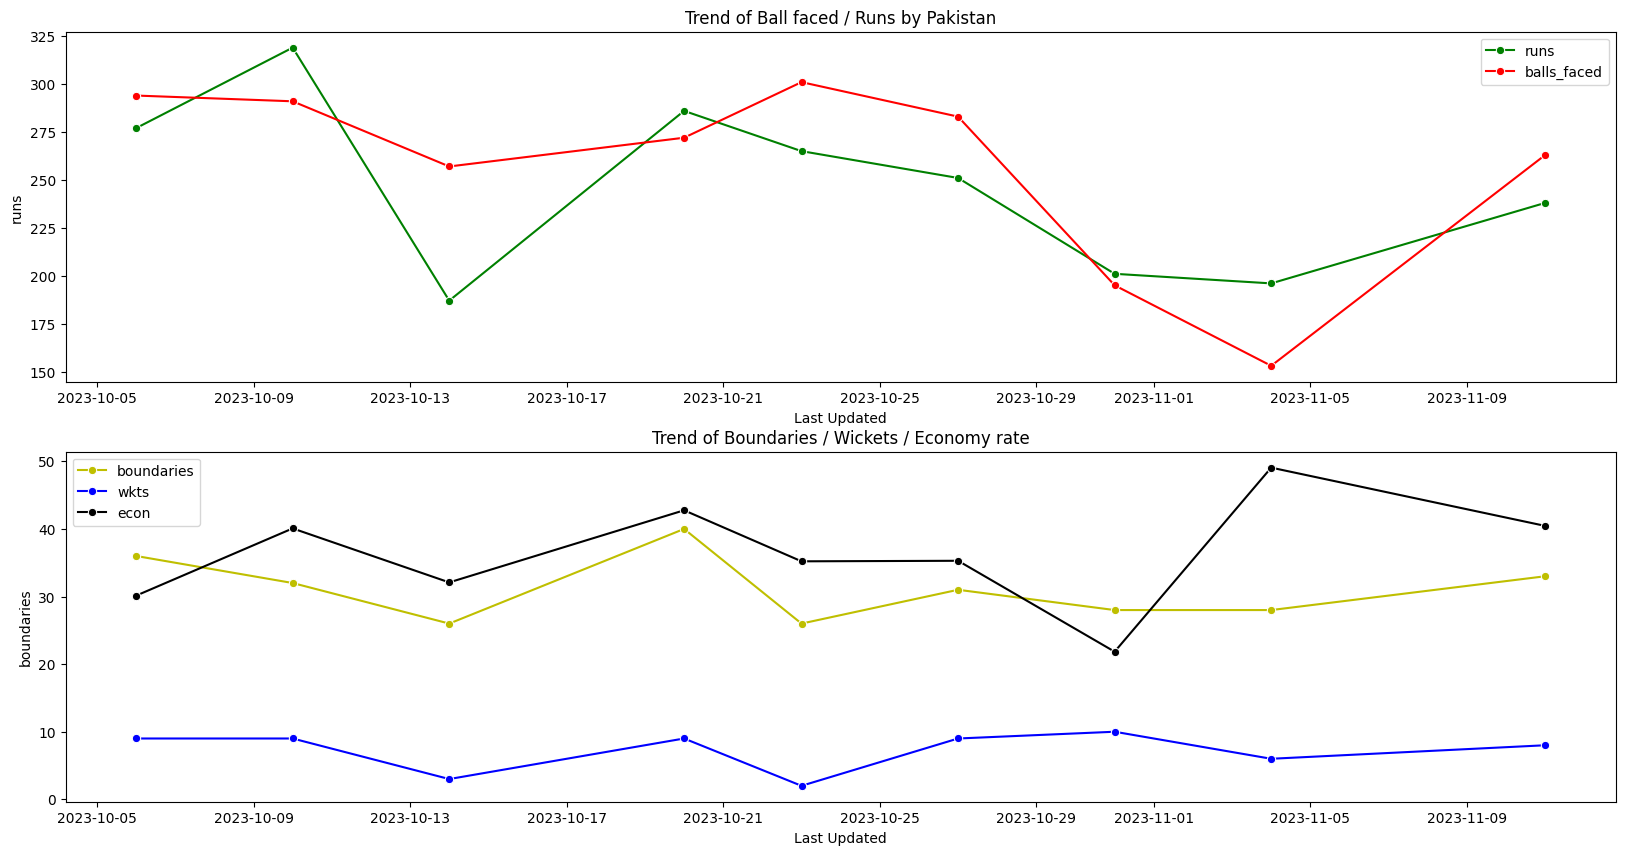

In [ ]:
PAK_trend_bat = PAK_info[(PAK_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
PAK_trend_bowl = PAK_info[(PAK_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = PAK_trend_bat, label='runs', color = 'g',  marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = PAK_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by Pakistan")


plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = PAK_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = PAK_trend_bowl, label='wkts', color = 'b',marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = PAK_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * Maximum times pakistan made runs lower than balls faced
 * Economy rate increased at the end of the tournament
 * Maximum boundaries is on the match 2023-10-20.

<ipython-input-38-f73af040b4de>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ENG_trend_bat = ENG_info[(ENG_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-38-f73af040b4de>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ENG_trend_bowl = ENG_info[(ENG_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

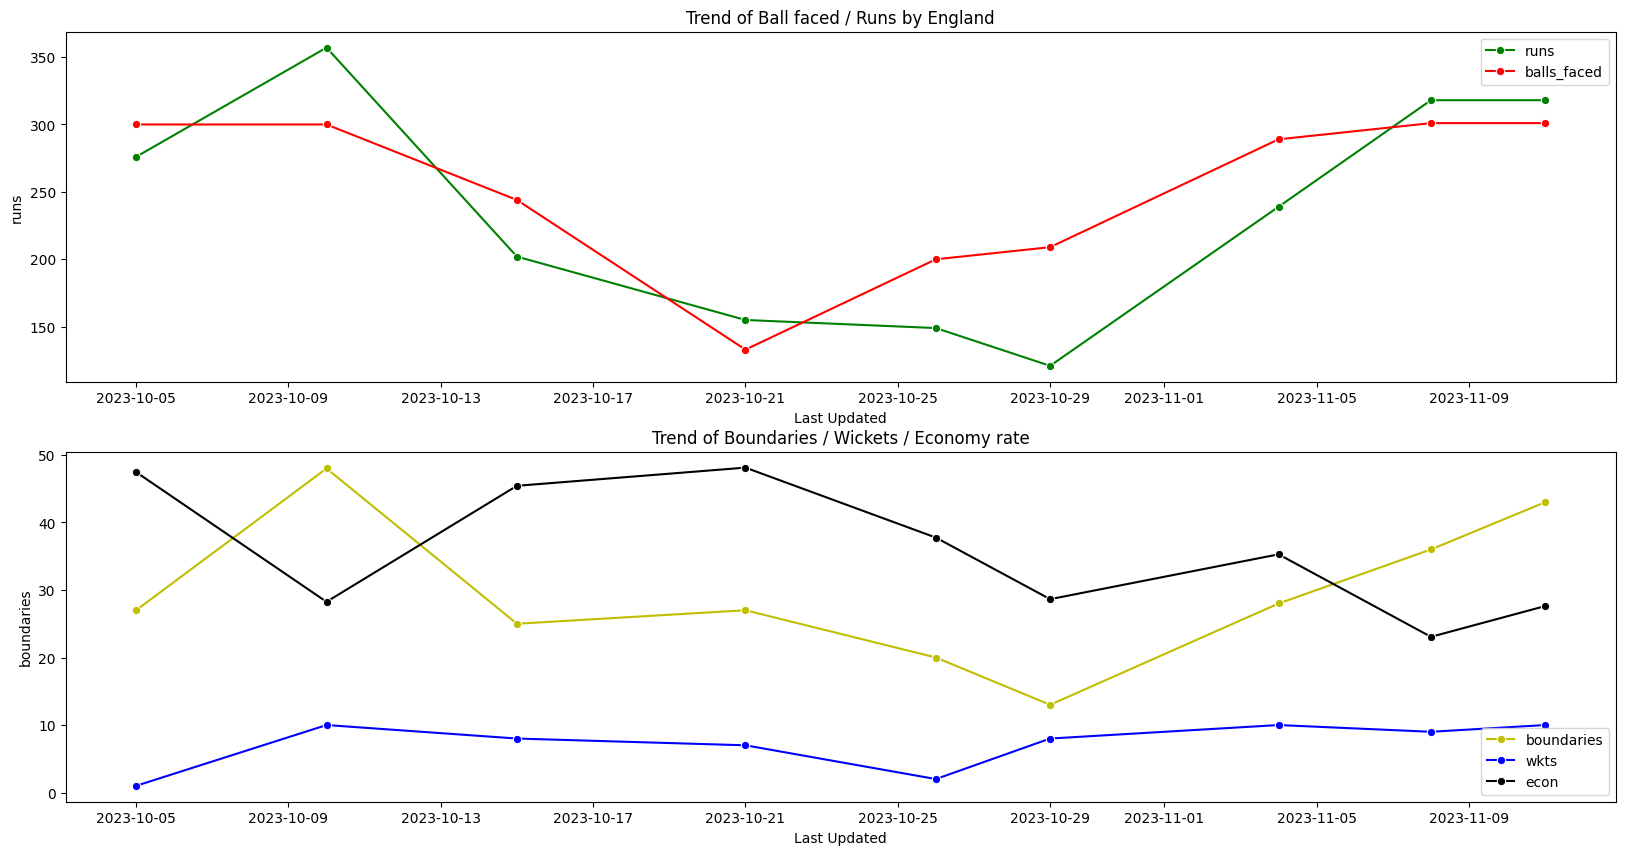

In [ ]:
ENG_trend_bat = ENG_info[(ENG_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
ENG_trend_bowl = ENG_info[(ENG_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = ENG_trend_bat, label='runs', color = 'g', marker="o" )
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = ENG_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by England")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = ENG_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = ENG_trend_bowl, label='wkts', color = 'b' , marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = ENG_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * Balls faced and as well as runs made got a dip in middle of the tournament. As a result boundaries are lower in that period. They must be all out before facing all the balls.
 * During their hard time in the middle, economy rate is also very high. It must be pretty clear to them that its not worth trying now.
 * Wickets is consistent.

<ipython-input-39-40dc092fd3dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NZ_trend_bat = NZ_info[(NZ_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-39-40dc092fd3dc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NZ_trend_bowl = NZ_info[(NZ_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

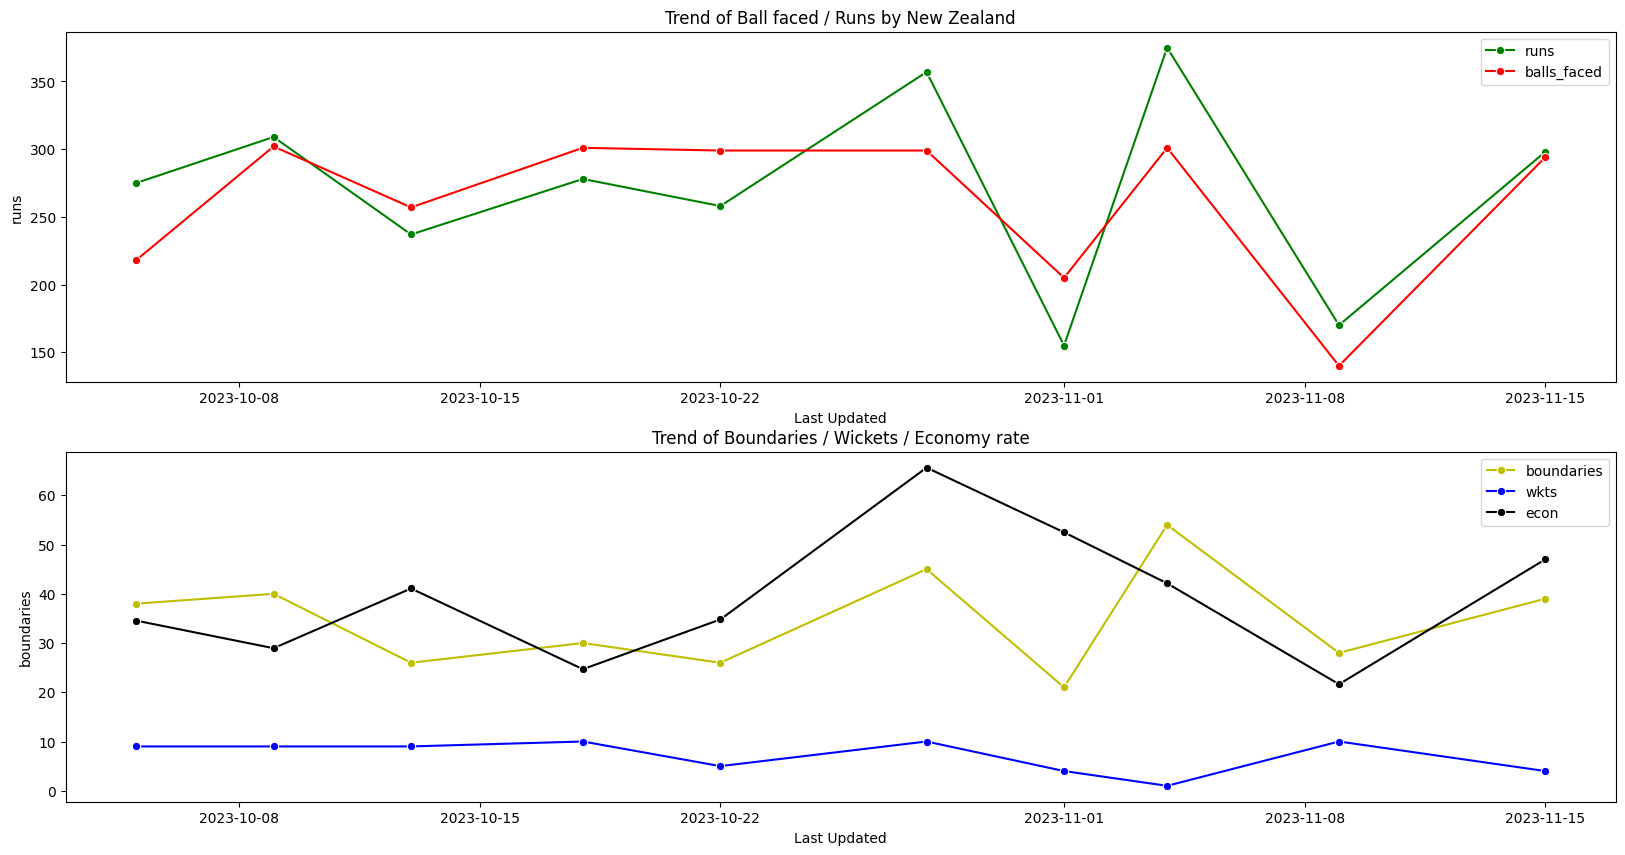

In [ ]:
NZ_trend_bat = NZ_info[(NZ_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
NZ_trend_bowl = NZ_info[(NZ_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = NZ_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = NZ_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by New Zealand")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = NZ_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = NZ_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = NZ_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * Out of 10 matches, in 6 matches New Zealand scored runs more than balls faced. In best 2 matched, they also scored higher boundaries.
 * Economy rate is good at the start.

<ipython-input-61-b896cda1400d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AFG_trend_bat = AFG_info[(AFG_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-61-b896cda1400d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AFG_trend_bowl = AFG_info[(AFG_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

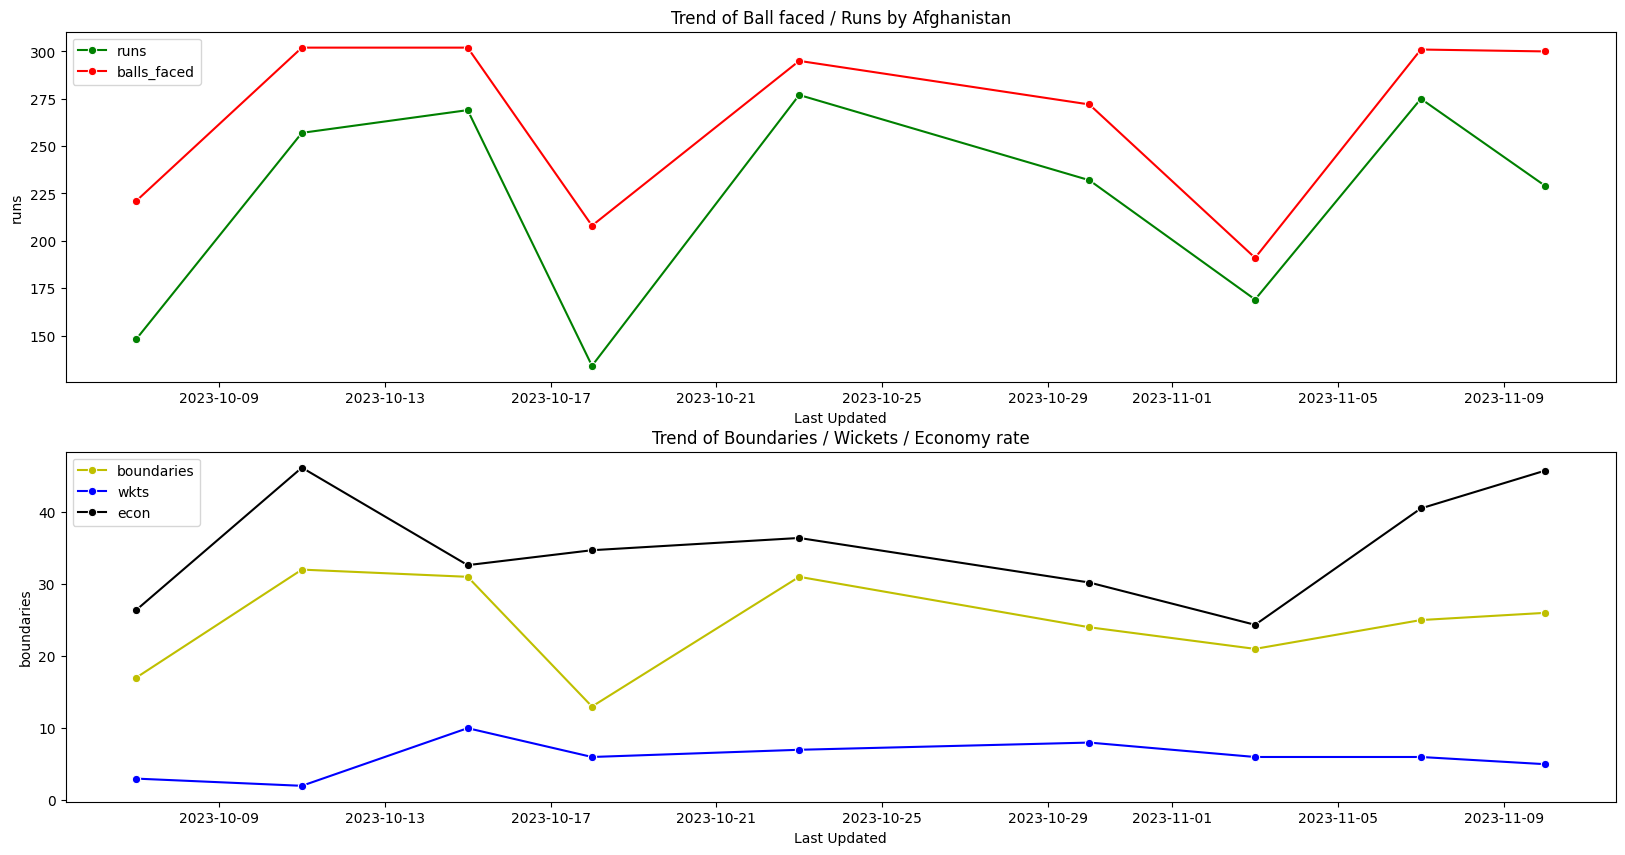

In [ ]:
AFG_trend_bat = AFG_info[(AFG_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
AFG_trend_bowl = AFG_info[(AFG_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = AFG_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = AFG_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by Afghanistan")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = AFG_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = AFG_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = AFG_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * In all matches, Afghanistan scored less runs than it faced.
 * Very less boundaries on 18th Oct match.
 * In starting matches, AFG took less wickets.

<ipython-input-60-e5535a43970f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NED_trend_bat = NED_info[(NED_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-60-e5535a43970f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NED_trend_bowl = NED_info[(NED_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

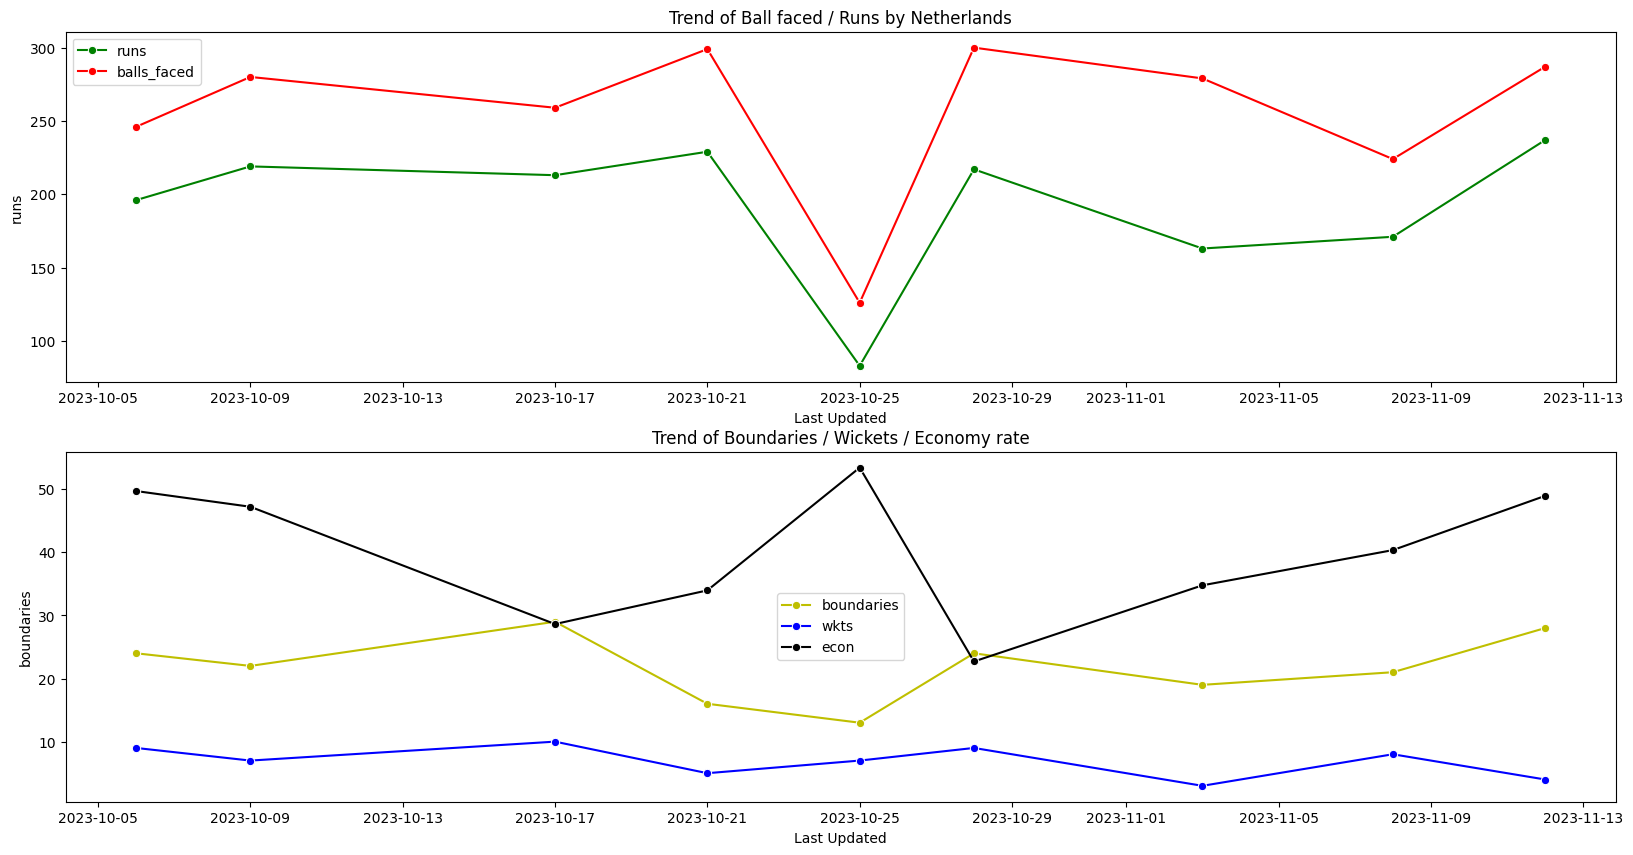

In [ ]:
NED_trend_bat = NED_info[(NED_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
NED_trend_bowl = NED_info[(NED_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = NED_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = NED_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by Netherlands")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = NED_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = NED_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = NED_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * In all matches, Netherlands scored less runs than it faced. Also, it scored less than 100 in one match in between.
 * Boundaries were also not competitive as compared to other teams throughout the tournament.
 * Economy rate improved in 28 Oct match.

<ipython-input-59-46d46e92eeff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  BAN_trend_bat = BAN_info[(BAN_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-59-46d46e92eeff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  BAN_trend_bowl = BAN_info[(BAN_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

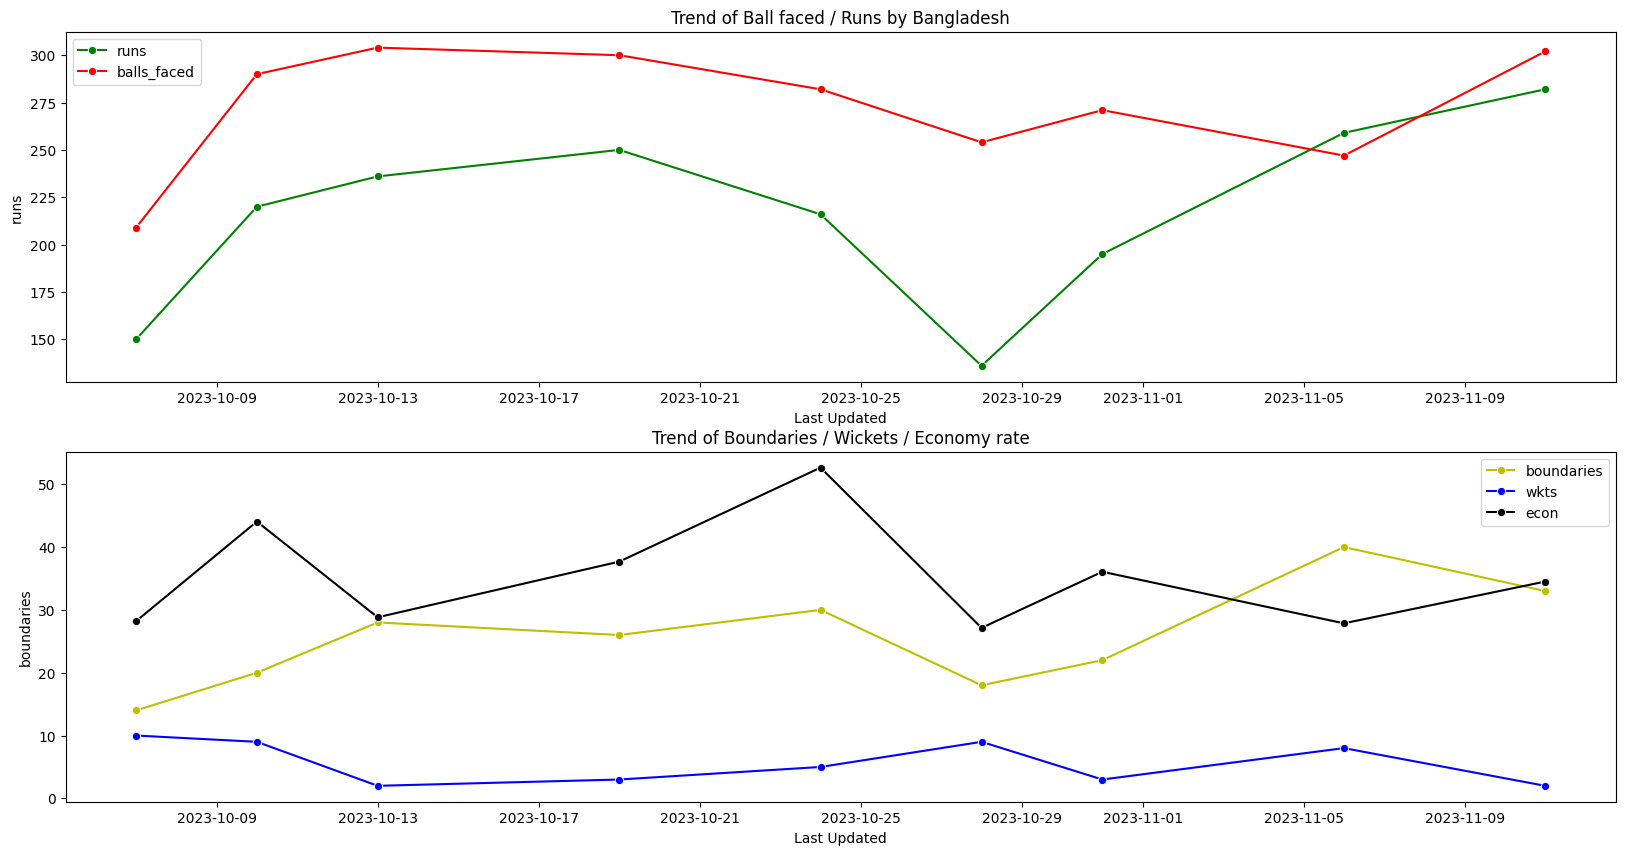

In [ ]:
BAN_trend_bat = BAN_info[(BAN_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
BAN_trend_bowl = BAN_info[(BAN_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = BAN_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = BAN_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by Bangladesh")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = BAN_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = BAN_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = BAN_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * Except one match, Bangladesh scored less runs than it faced. Also, it scored less than or equal to 150 in two match in between. They improved after the match on 28 Oct.
 * Number of boundaries increased after the match of 28 Oct.

<ipython-input-58-90b62aca1177>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SA_trend_bat = SA_info[(SA_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-58-90b62aca1177>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SA_trend_bowl = SA_info[(SA_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

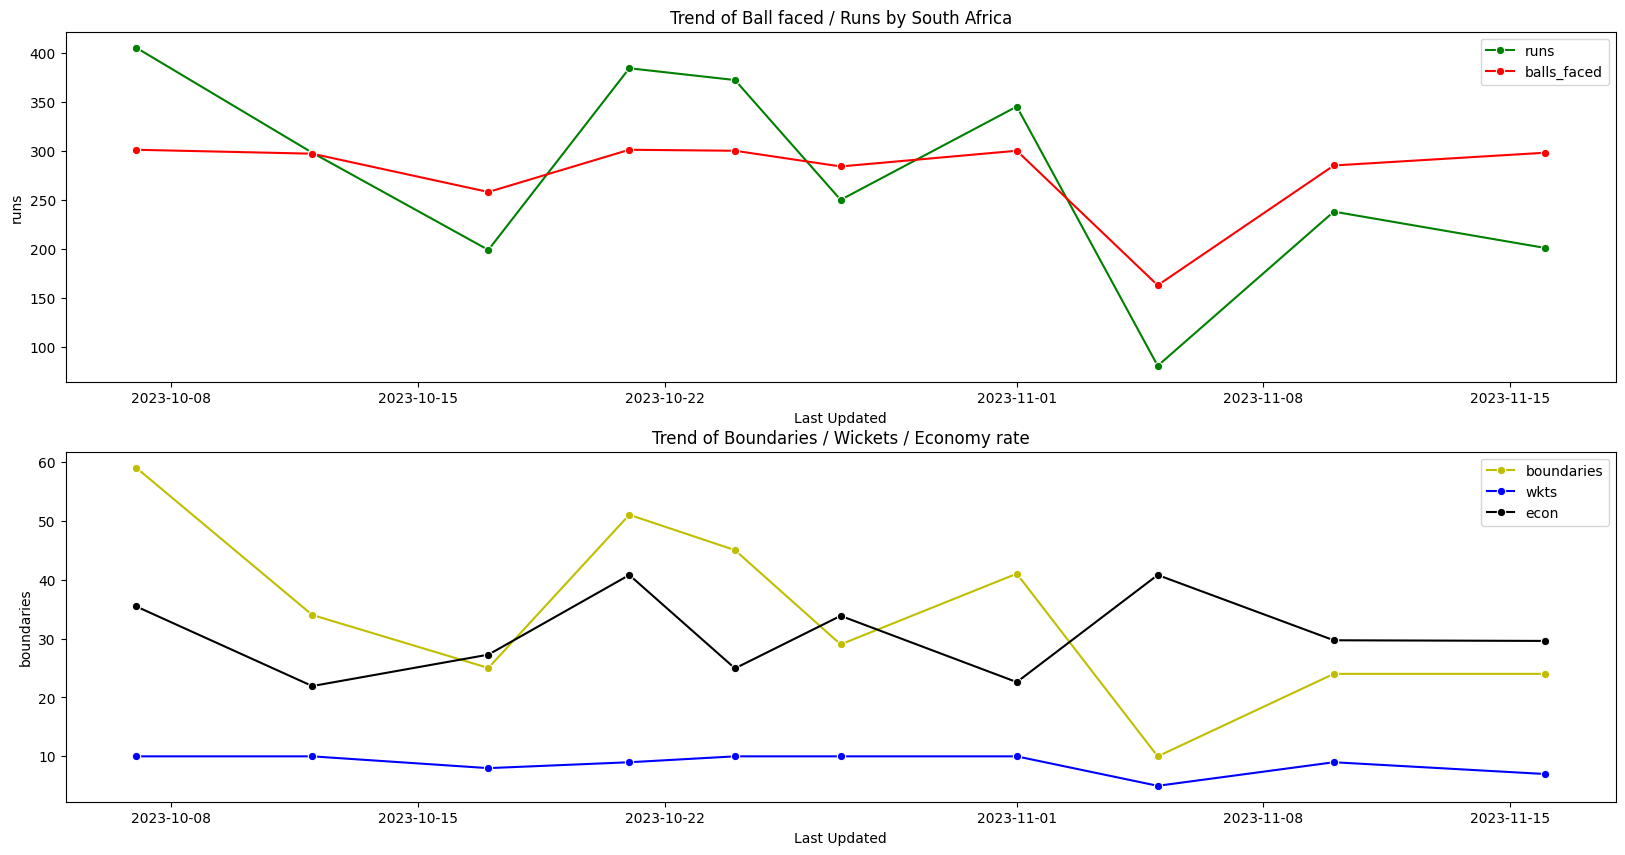

In [ ]:
SA_trend_bat = SA_info[(SA_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
SA_trend_bowl = SA_info[(SA_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = SA_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = SA_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by South Africa")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = SA_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = SA_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = SA_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * Performance of South Africa gradually decresed from the start and then become irregular
 * Boundaries and runs made follows a similar pattern.

<ipython-input-57-334a27148f64>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SL_trend_bat = SL_info[(SL_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-57-334a27148f64>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SL_trend_bowl = SL_info[(SL_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

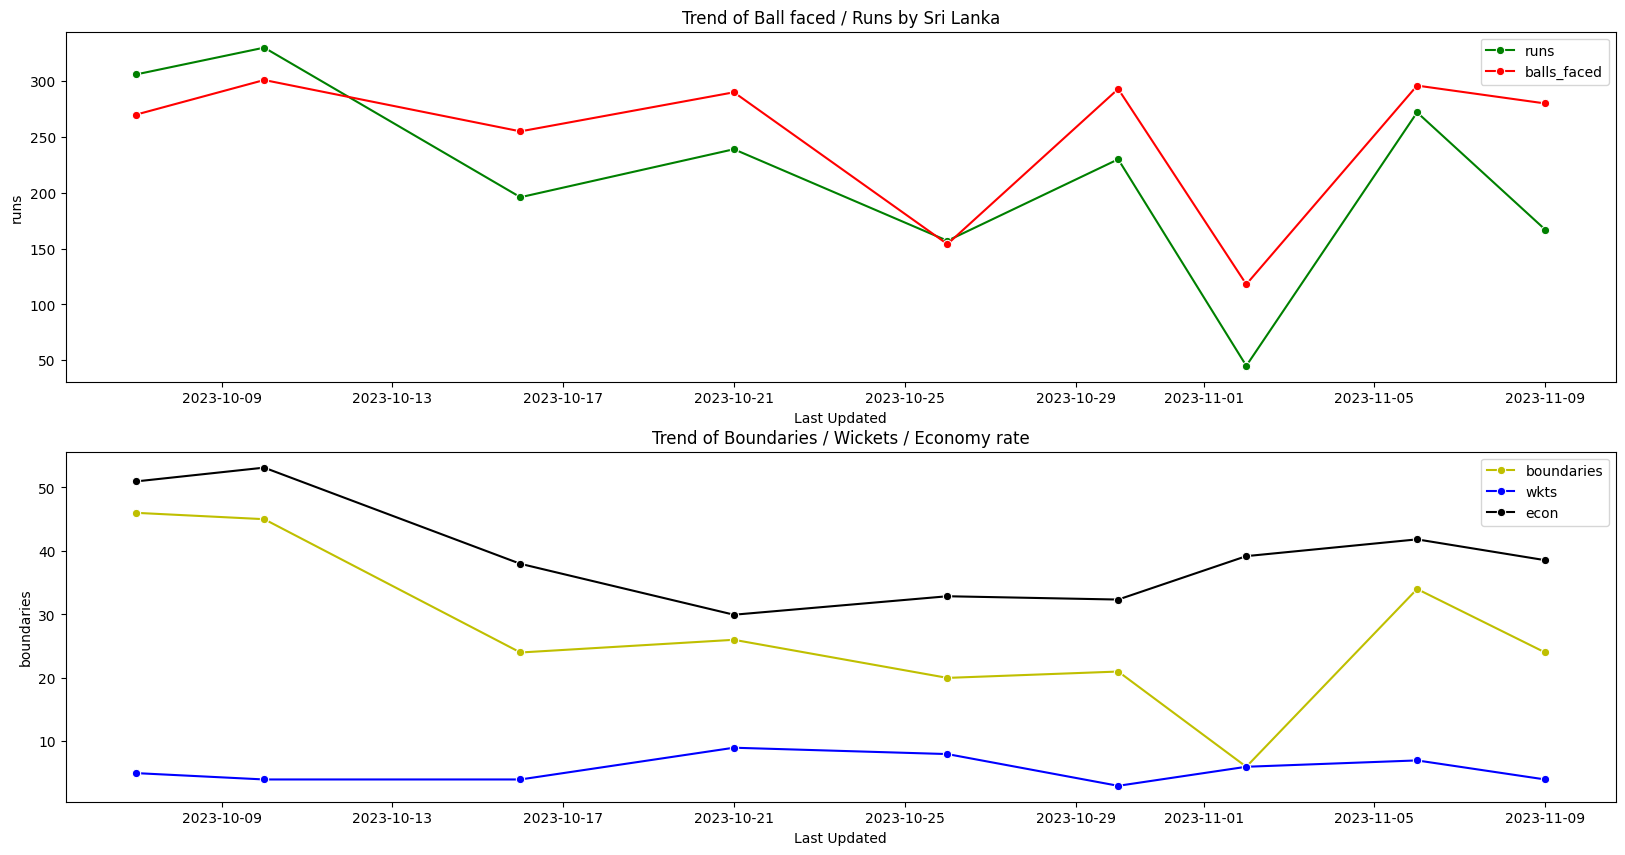

In [ ]:
SL_trend_bat = SL_info[(SL_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
SL_trend_bowl = SL_info[(SL_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = SL_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = SL_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by Sri Lanka")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = SL_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = SL_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = SL_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

 * In 6 out or 9 matches, Sri Lanka scored less runs than it faced balls.
 * On match of 2 Nov, it scored less than 50 runs as we,, as lowest boundaries.
 * Performance of Sri Lanka gradually decreased from the start.

<ipython-input-56-59107a21dbba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AUS_trend_bat = AUS_info[(AUS_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-56-59107a21dbba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AUS_trend_bowl = AUS_info[(AUS_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

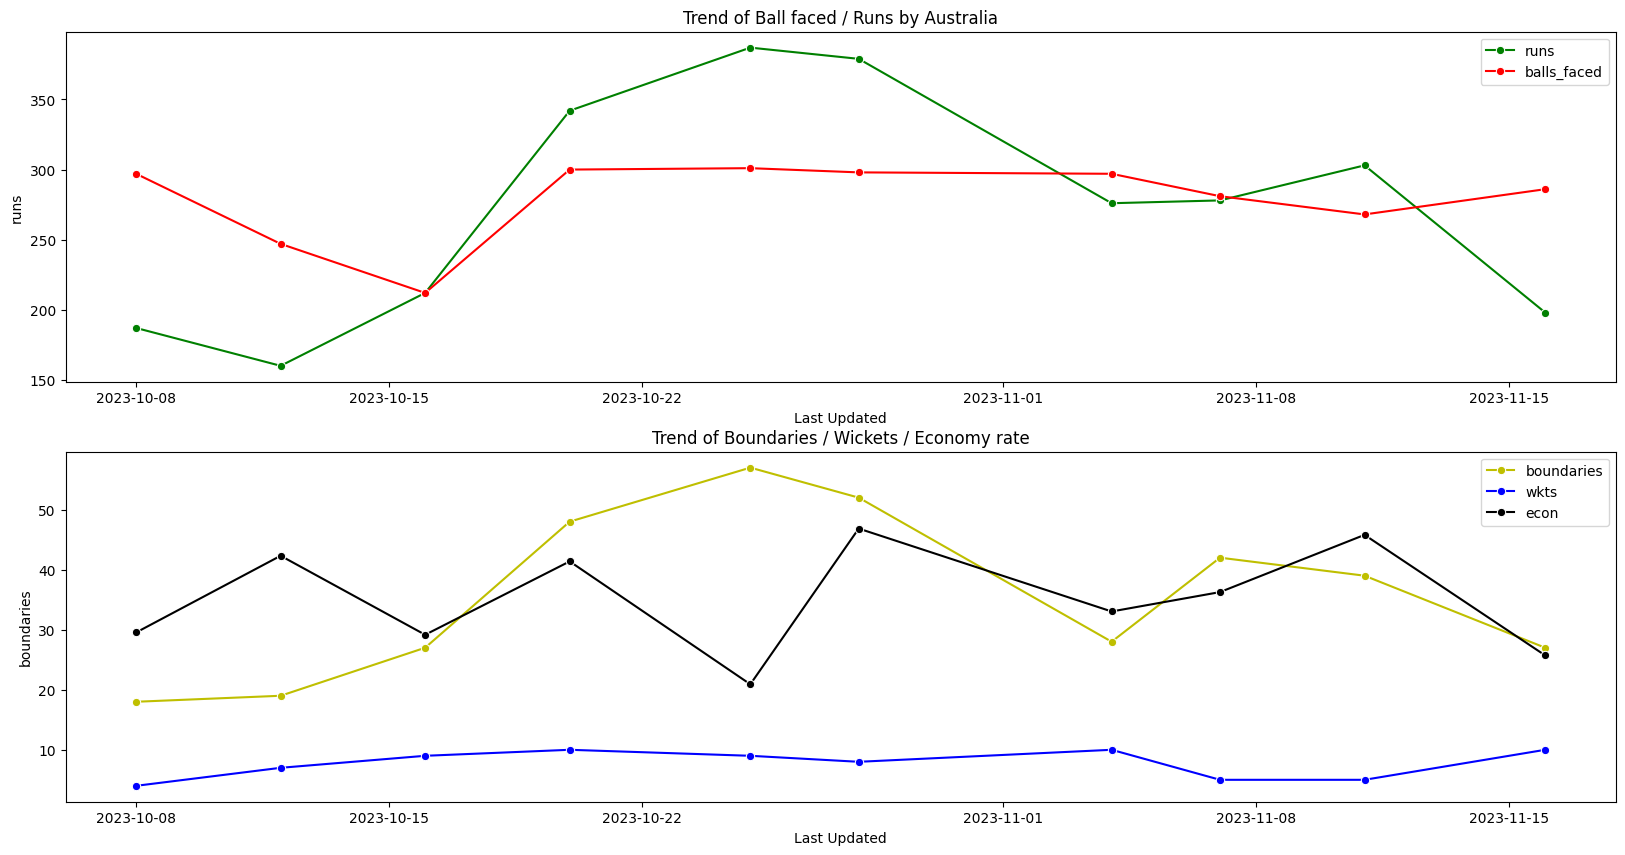

In [ ]:
AUS_trend_bat = AUS_info[(AUS_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
AUS_trend_bowl = AUS_info[(AUS_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = AUS_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = AUS_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by Australia")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = AUS_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = AUS_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = AUS_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

* Total runs as well boundaries got improved between 16 Oct to 3 Mov. It performed comparatively bad in starting and ending match.
* Economy rate is not consistant.

<ipython-input-55-7db0df9564d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IND_trend_bat = IND_info[(IND_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
<ipython-input-55-7db0df9564d4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IND_trend_bowl = IND_info[(IND_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()


Text(0.5, 1.0, 'Trend of Boundaries / Wickets / Economy rate')

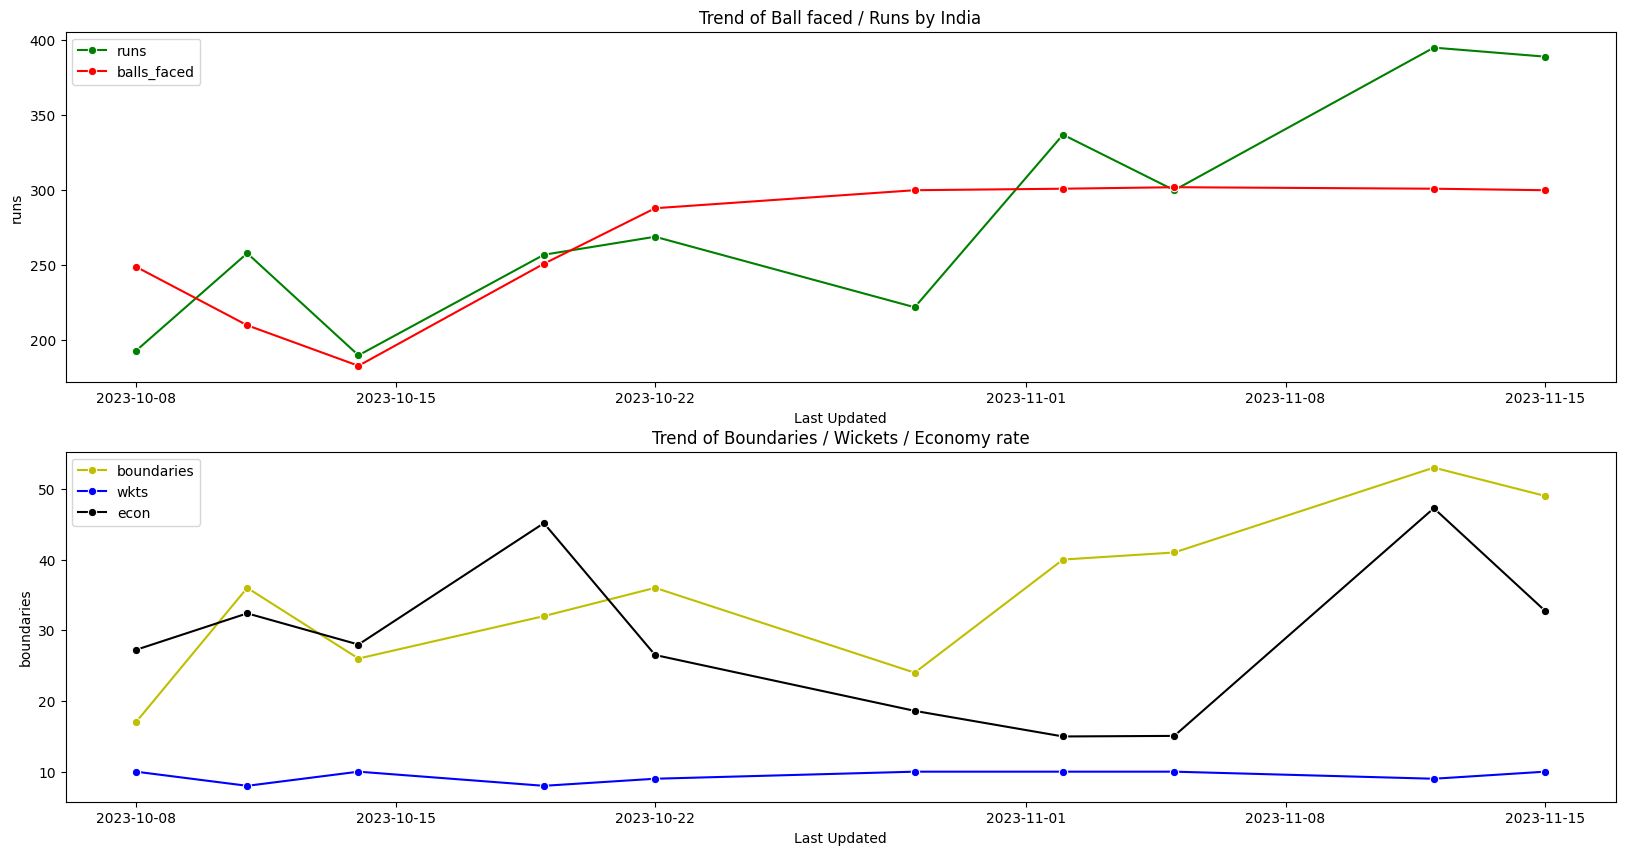

In [ ]:
IND_trend_bat = IND_info[(IND_info['bat_or_bowl'] == 'bat')].groupby(['Last Updated'], as_index = False)['bb_bf', 'runs', 'boundaries'].sum()
IND_trend_bowl = IND_info[(IND_info['bat_or_bowl'] == 'bowl')].groupby(['Last Updated'], as_index = False)['wkts','econ'].sum()

fig = plt.figure(figsize =(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x = 'Last Updated', y= 'runs' ,data = IND_trend_bat, label='runs', color = 'g', marker="o")
sns.lineplot(x = 'Last Updated', y= 'bb_bf' ,data = IND_trend_bat, label='balls_faced', color = 'r', marker="o")
plt.title("Trend of Ball faced / Runs by India")

plt.subplot(2,1,2)
sns.lineplot(x = 'Last Updated', y= 'boundaries' ,data = IND_trend_bat, label='boundaries', color = 'y', marker="o")
sns.lineplot(x = 'Last Updated', y= 'wkts' ,data = IND_trend_bowl, label='wkts', color = 'b', marker="o")
sns.lineplot(x = 'Last Updated', y= 'econ' ,data = IND_trend_bowl, label='econ', color = 'black', marker="o")
plt.title("Trend of Boundaries / Wickets / Economy rate")

* Total runs as well boundaries got improved from 14 Oct till end with some fluctuations. It performed comparatively bad in starting match.
* There is a consistant dip in economy rate from 22 Oct till 6 Nov.